# ML project

# Library import, etc

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

np.random.seed(1)

In [165]:
import sklearn
# assert(sklearn.__version__ > '0.18' and sklearn.__version__ < '0.20')
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
%matplotlib inline

In [166]:
corr_thre = 0.4

In [167]:
DoNormalization = 'y'  # input('Enter your input to do standardization (Y or N):')      # If you use Python 3

In [168]:
DoMultiColEnh = 'n' # input('Enter your input to enhance multi colinearity (Y or N):')      # If you use Python 3

In [169]:
if (DoMultiColEnh =='y' or DoMultiColEnh =='Y'):
    MultiCol_R2_thre = input('Enter R2 threshold to enhance multicolinearity(0-1):')
    MultiCol_R2_thre = float(MultiCol_R2_thre)

In [170]:
UseBicAicOverwrite = input('Overwite by using feature list found by Aic or Aic:(y or n)/')      # If you use Python 3
if( UseBicAicOverwrite =='y' or UseBicAicOverwrite  =='Y'):
    UseBicAicOverwriteChoice = input('1(forwardAIC), 2(backwardAIC), 3(bothAIC.empty), 4(bothAIC.full),\
    5(forwardBIC), 6(backwardBIC), 7(bothBIC.empty), 8(bothBIC.full) ')
    UseBicAicOverwriteChoice = int(UseBicAicOverwriteChoice)
        

Overwite by using feature list found by Aic or Aic:(y or n)/n


In [171]:
N_folds = 7 # input('Enter # of folds for cross validation(ex:3,5,y=7,etc)')
N_folds = int(N_folds)

# Data Import

In [172]:
traindata = pd.read_csv('data/train.csv', index_col=0)
testdata = pd.read_csv('data/test.csv', index_col=0)

traindata.SalePrice=np.log( traindata.SalePrice )

In [173]:
traindata.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [174]:
traindata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [175]:
print(traindata.shape)
print(testdata.shape)

(1460, 80)
(1459, 79)


In [176]:
# print(traindata.value_counts())
# print(traindata.value_counts())

In [177]:
# traindata.hist(bins=50, figsize=(30,20))

In [178]:
n_unique =traindata.nunique() 
null_perc = traindata.isnull().sum()/traindata.shape[0]*100
NA_perc = traindata.isnull().sum()/traindata.shape[0]*100

trdata_analysis = pd.DataFrame({'n_unique': n_unique, 'null_perc': null_perc, 'NA_perc': NA_perc})

In [179]:
trdata_analysis

,n_unique,null_perc,NA_perc
MSSubClass,15,0.000000,0.000000
MSZoning,5,0.000000,0.000000
LotFrontage,110,17.739726,17.739726
LotArea,1073,0.000000,0.000000
Street,2,0.000000,0.000000
Alley,2,93.767123,93.767123
LotShape,4,0.000000,0.000000
LandContour,4,0.000000,0.000000
Utilities,2,0.000000,0.000000
LotConfig,5,0.000000,0.000000


In [180]:
# trdata_analysis.to_csv('./data/uni_miss.csv')

# ordinal/nominal predictors processing ############

In [181]:
# traindata.Alley = traindata.Alley.replace({"Grvl":2, "Pave":1}) # Grvl: Gravel, Pave: Paved, NA: No alley access
traindata.Alley = traindata.Alley.fillna('NoAlleyAccess')
traindata.BsmtCond = traindata.BsmtCond.replace({"Ex": 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.BsmtCond = traindata.BsmtCond.fillna(0)

traindata.BsmtExposure = traindata.BsmtExposure.replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1})
traindata.BsmtExposure = traindata.BsmtExposure.fillna(0)
traindata.BsmtFinType1 = traindata.BsmtFinType1.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
traindata.BsmtFinType1 = traindata.BsmtFinType1.fillna(0)
traindata.BsmtFinType2 = traindata.BsmtFinType2.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
traindata.BsmtFinType2 = traindata.BsmtFinType2.fillna(0)
traindata.BsmtQual = traindata.BsmtQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.BsmtQual = traindata.BsmtQual.fillna(0)
traindata.Electrical = traindata.Electrical.replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
traindata.ExterCond = traindata.ExterCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.ExterCond = traindata.ExterCond.fillna(0)
traindata.ExterQual = traindata.ExterQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.ExterQual = traindata.ExterQual.fillna(0)

traindata.Fence = traindata.Fence.replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1})
traindata.Fence = traindata.Fence.fillna(0)

traindata.FireplaceQu = traindata.FireplaceQu.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.FireplaceQu = traindata.FireplaceQu.fillna(0)
traindata.Functional = traindata.Functional.replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
traindata.GarageCond = traindata.GarageCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.GarageCond = traindata.GarageCond.fillna(0)
traindata.GarageFinish = traindata.GarageFinish.replace({'Fin': 3, 'RFn': 2, 'Unf': 1})
traindata.GarageFinish = traindata.GarageFinish.fillna(0)


# traindata.GarageType = traindata.GarageType.replace({"2Types":6, "Attchd":5, "Basment":4, "BuiltIn":3, "CarPort":2, "Detchd":1  })
traindata.GarageType = traindata.GarageType.fillna('NoGarage')

traindata.GarageQual = traindata.GarageQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.GarageQual = traindata.GarageQual.fillna(0)
traindata.HeatingQC = traindata.HeatingQC.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.HeatingQC = traindata.HeatingQC.fillna(0)
traindata.KitchenQual = traindata.KitchenQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
traindata.KitchenQual = traindata.KitchenQual.fillna(0)
traindata.LandSlope = traindata.LandSlope.replace({'Gtl': 3, 'Mod': 2, 'Sev': 1})
traindata.LandSlope = traindata.LandSlope.fillna(0)
traindata.LotShape = traindata.LotShape.replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
traindata.LotShape = traindata.LotShape.fillna(0)

traindata.MiscFeature = traindata.MiscFeature.fillna('NoMiscFeature')

# traindata.MasVnrType  = traindata.MasVnrType.replace({"BrkCmn":4, "BrkFace":3, "CBlock":2, "Stone":1, "None": 'NoMasonry'})
traindata.MasVnrType = traindata.MasVnrType.fillna('NoMasonry')

traindata.PoolQC = traindata.PoolQC.replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})
traindata.PoolQC = traindata.PoolQC.fillna(0)

traindata.Utilities = traindata.Utilities.replace({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, ' ELO': 1})

In [182]:
# testdata.Alley = testdata.Alley.replace({"Grvl":2, "Pave":1}) # Grvl: Gravel, Pave: Paved, NA: No alley access
testdata.Alley = testdata.Alley.fillna('NoAlleyAccess')
testdata.BsmtCond = testdata.BsmtCond.replace({"Ex": 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.BsmtCond = testdata.BsmtCond.fillna(0)

testdata.BsmtExposure = testdata.BsmtExposure.replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1})
testdata.BsmtExposure = testdata.BsmtExposure.fillna(0)
testdata.BsmtFinType1 = testdata.BsmtFinType1.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
testdata.BsmtFinType1 = testdata.BsmtFinType1.fillna(0)
testdata.BsmtFinType2 = testdata.BsmtFinType2.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
testdata.BsmtFinType2 = testdata.BsmtFinType2.fillna(0)
testdata.BsmtQual = testdata.BsmtQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.BsmtQual = testdata.BsmtQual.fillna(0)
testdata.Electrical = testdata.Electrical.replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
testdata.ExterCond = testdata.ExterCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.ExterCond = testdata.ExterCond.fillna(0)
testdata.ExterQual = testdata.ExterQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.ExterQual = testdata.ExterQual.fillna(0)

testdata.Fence = testdata.Fence.replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1})
testdata.Fence = testdata.Fence.fillna(0)

testdata.FireplaceQu = testdata.FireplaceQu.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.FireplaceQu = testdata.FireplaceQu.fillna(0)
testdata.Functional = testdata.Functional.replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
testdata.GarageCond = testdata.GarageCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.GarageCond = testdata.GarageCond.fillna(0)
testdata.GarageFinish = testdata.GarageFinish.replace({'Fin': 3, 'RFn': 2, 'Unf': 1})
testdata.GarageFinish = testdata.GarageFinish.fillna(0)


# testdata.GarageType = testdata.GarageType.replace({"2Types":6, "Attchd":5, "Basment":4, "BuiltIn":3, "CarPort":2, "Detchd":1  })
testdata.GarageType = testdata.GarageType.fillna('NoGarage')

testdata.GarageQual = testdata.GarageQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.GarageQual = testdata.GarageQual.fillna(0)
testdata.HeatingQC = testdata.HeatingQC.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.HeatingQC = testdata.HeatingQC.fillna(0)
testdata.KitchenQual = testdata.KitchenQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
testdata.KitchenQual = testdata.KitchenQual.fillna(0)
testdata.LandSlope = testdata.LandSlope.replace({'Gtl': 3, 'Mod': 2, 'Sev': 1})
testdata.LandSlope = testdata.LandSlope.fillna(0)
testdata.LotShape = testdata.LotShape.replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
testdata.LotShape = testdata.LotShape.fillna(0)

testdata.MiscFeature = testdata.MiscFeature.fillna('NoMiscFeature')

# testdata.MasVnrType  = testdata.MasVnrType.replace({"BrkCmn":4, "BrkFace":3, "CBlock":2, "Stone":1, "None": 'NoMasonry'})
testdata.MasVnrType = testdata.MasVnrType.fillna('NoMasonry')

testdata.PoolQC = testdata.PoolQC.replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})
testdata.PoolQC = testdata.PoolQC.fillna(0)

testdata.Utilities = testdata.Utilities.replace({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, ' ELO': 1})

In [183]:
# traindata.columns

In [184]:
# isnull => greaer than 10% => delete the column

# traindata = traindata.drop(["Alley"], 1)
                            
# traindata = traindata.drop(["LotFrontage", "Alley", "FireplaceQu", "PoolQC", 
#                             "Fence", "MiscFeature"], 1)

# lotfrontage: numeric
# alley: nominal
# FireplaceQu: ordinal
# poolQC: ordinal
# fence: ordinal
# misc feature: nominal

In [185]:
# trdatadesc = traindata.describe() # rhis tells only about numeric columns 

# print(trdatadesc)

# trdatadesc.to_csv('trdatadesc.csv')

dtdec = pd.read_csv('./data/dtdec.csv', index_col=0)
dtdec = dtdec.reset_index()
# dtdec.shape

In [186]:
# nominal vs. SalePrice
# dtdec.loc[dtdec.typedec=='nominal'] 

nominal_df = dtdec.loc[dtdec['typedec'] == 'nominal'][['Name']]
nominal_df = nominal_df.reset_index(drop=True)

numeric_df = dtdec.loc[dtdec['typedec'] == 'numeric'][['Name']]
numeric_df = numeric_df.reset_index(drop=True)

ordinal_df = dtdec.loc[dtdec['typedec'] == 'ordinal'][['Name']]
ordinal_df = ordinal_df.reset_index(drop=True)

In [187]:
print( nominal_df.shape )
print( numeric_df.shape )
print( ordinal_df.shape )

(23, 1)
(34, 1)
(23, 1)


# EDA: numeric predictors' histogram ############

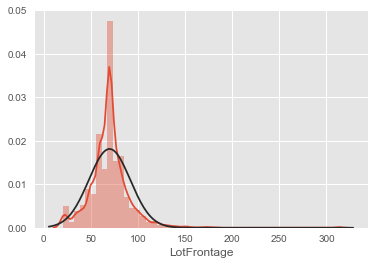

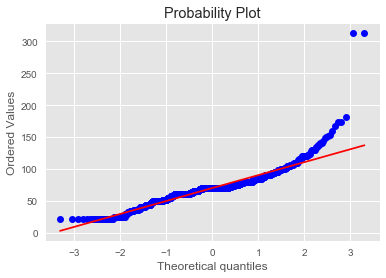

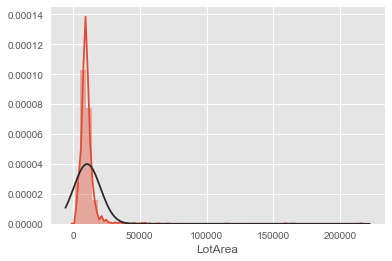

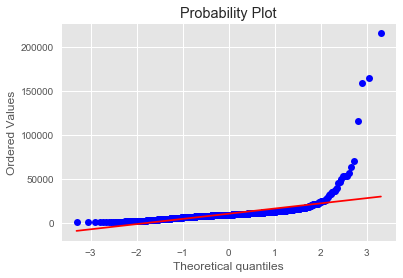

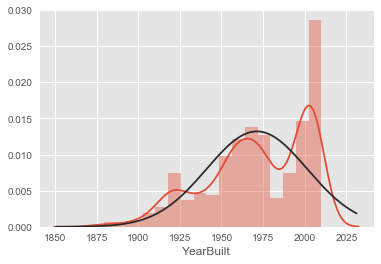

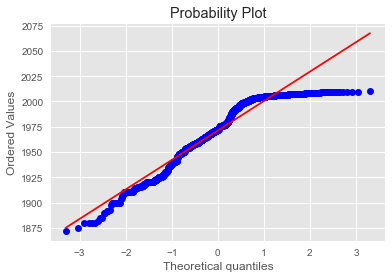

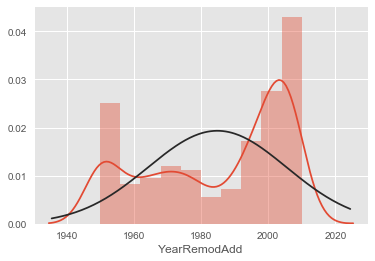

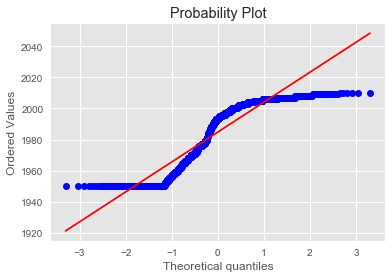

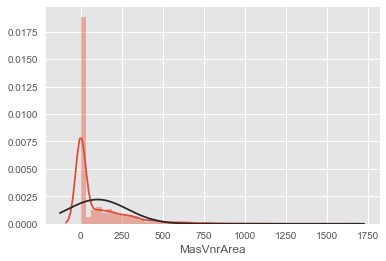

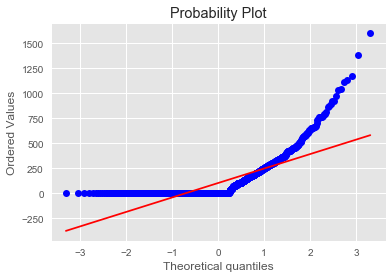

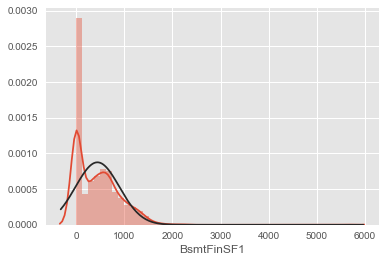

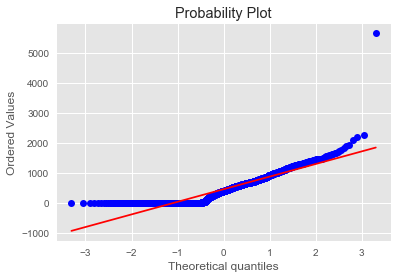

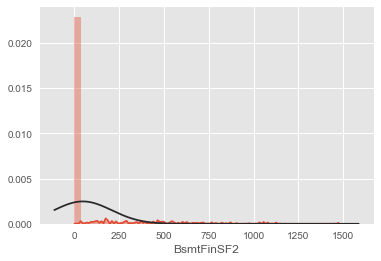

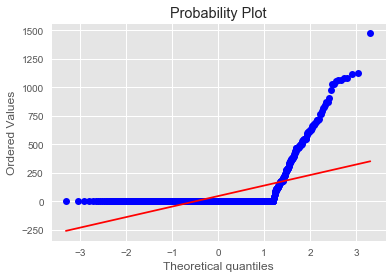

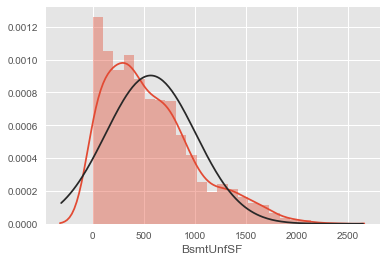

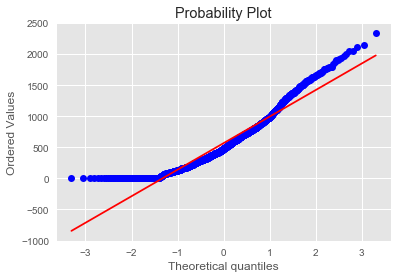

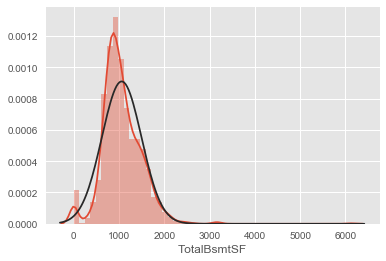

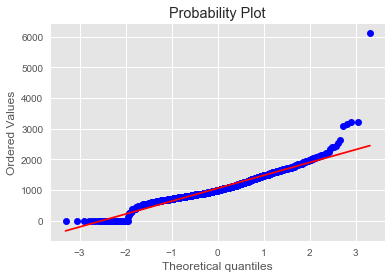

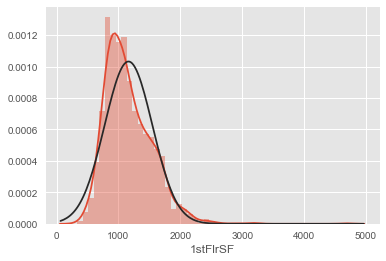

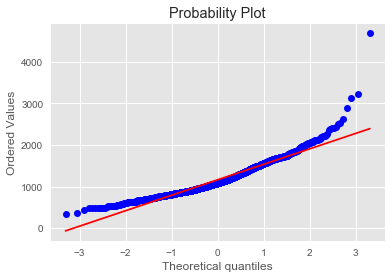

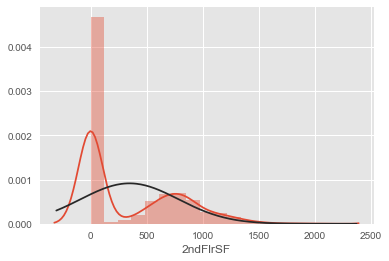

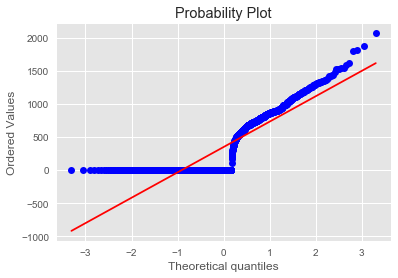

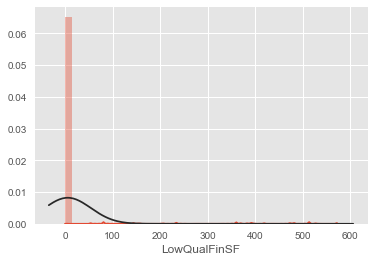

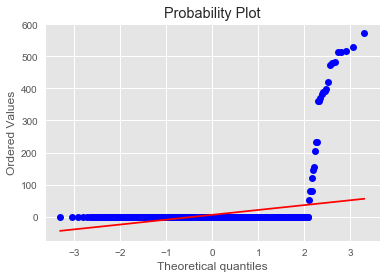

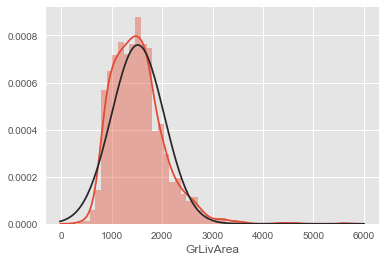

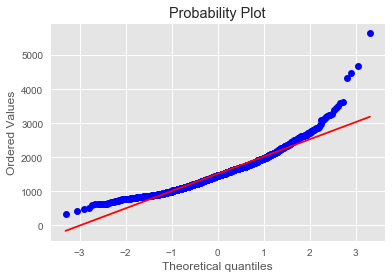

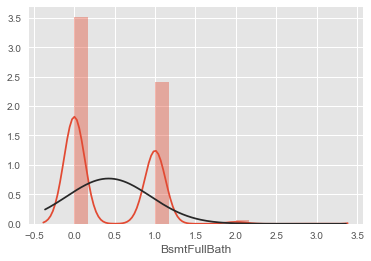

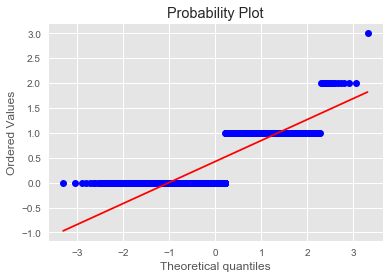

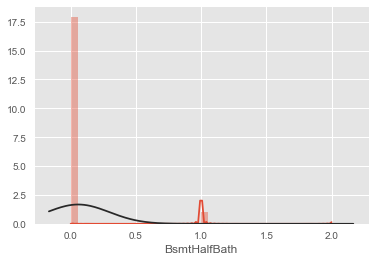

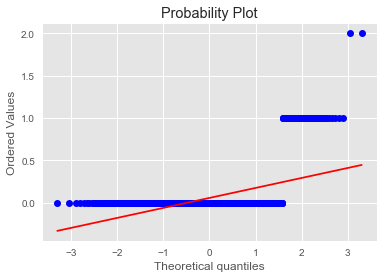

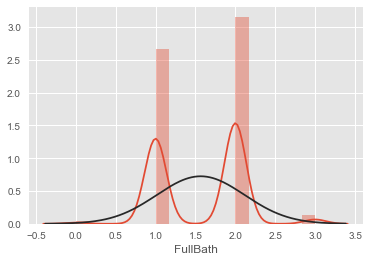

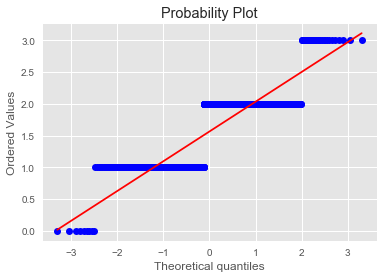

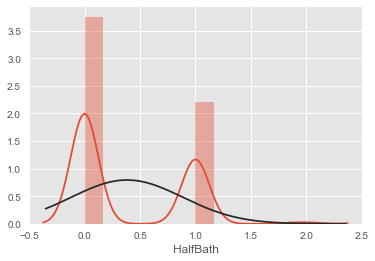

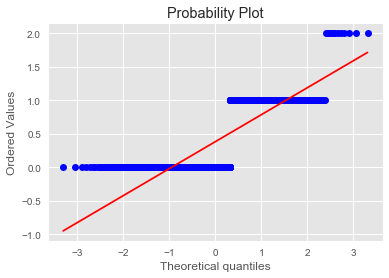

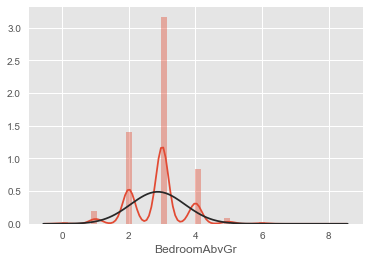

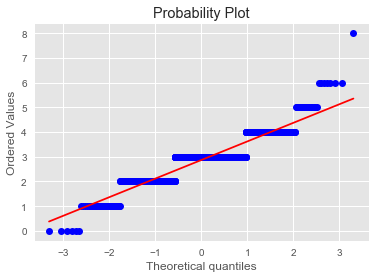

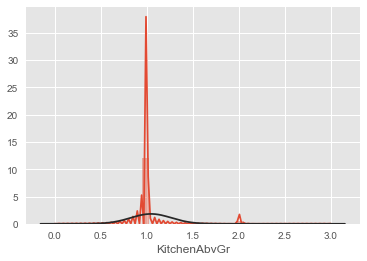

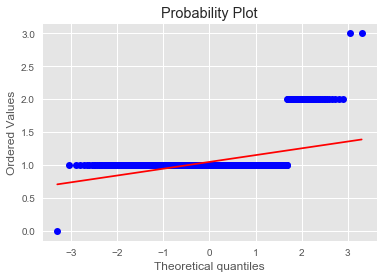

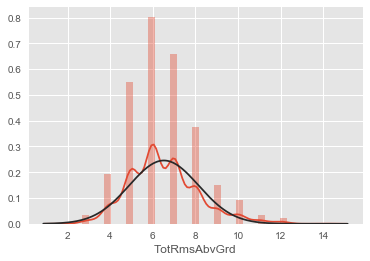

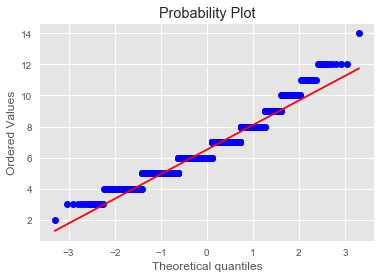

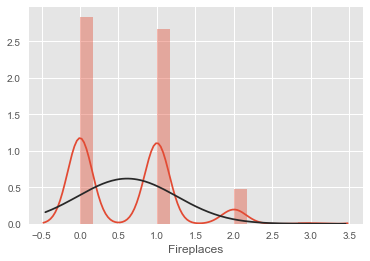

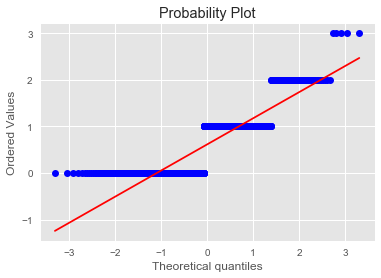

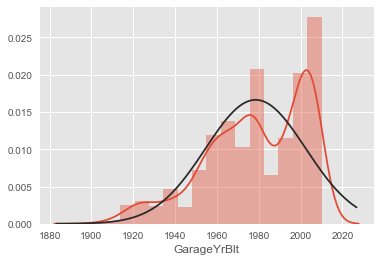

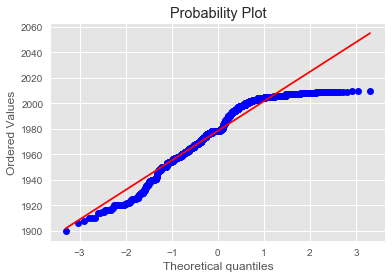

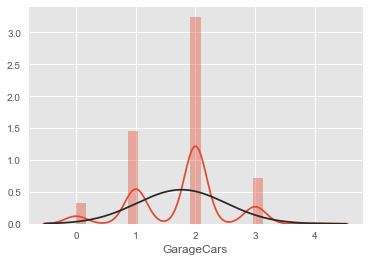

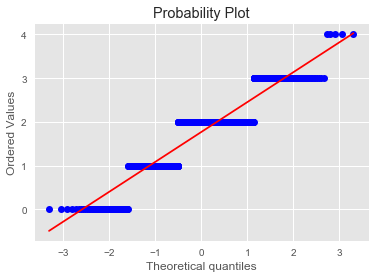

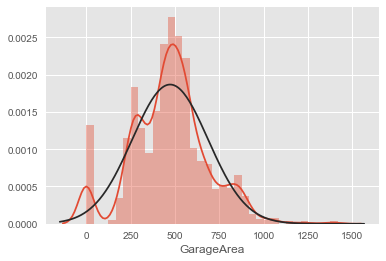

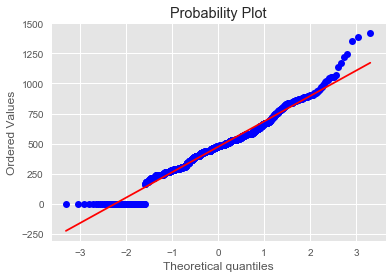

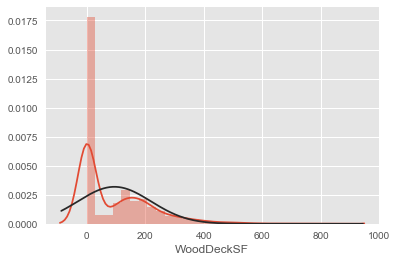

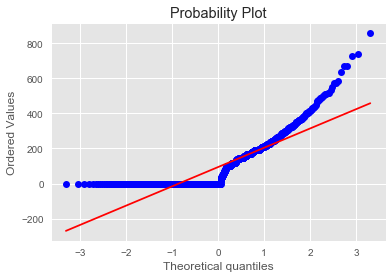

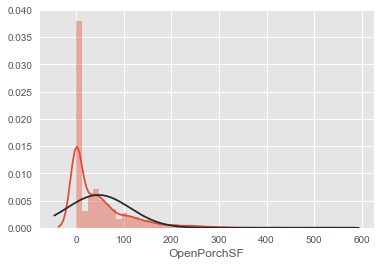

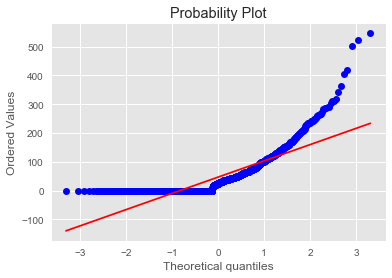

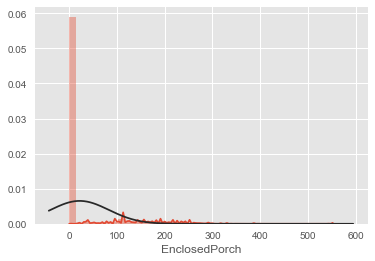

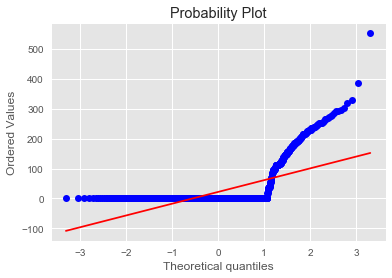

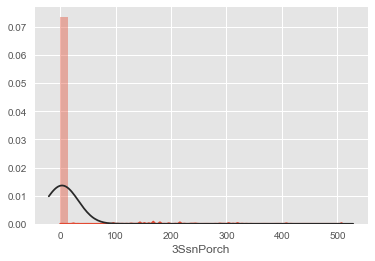

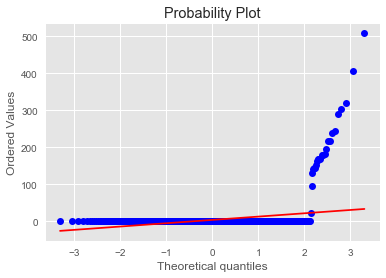

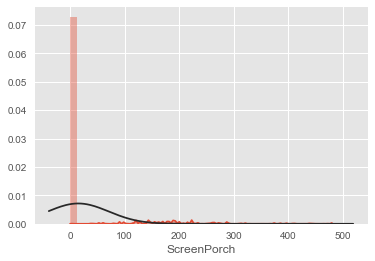

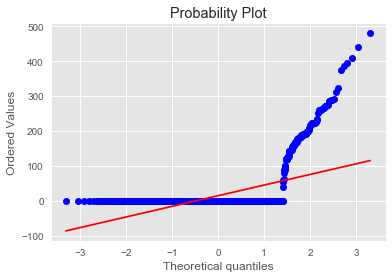

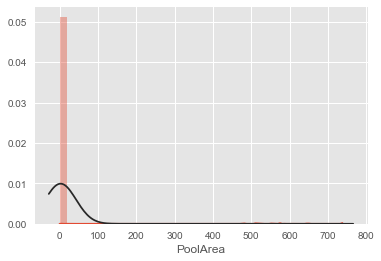

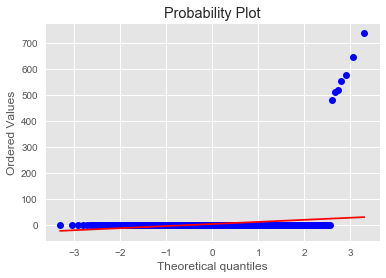

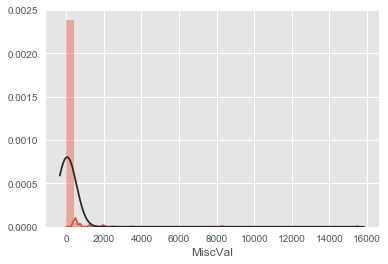

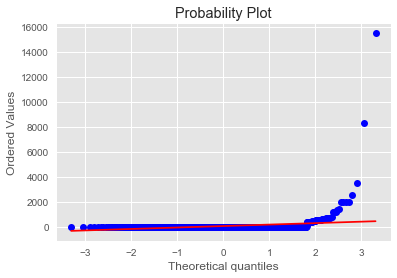

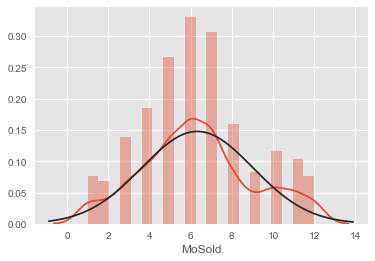

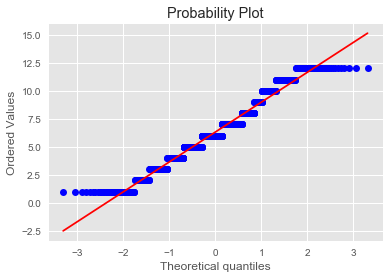

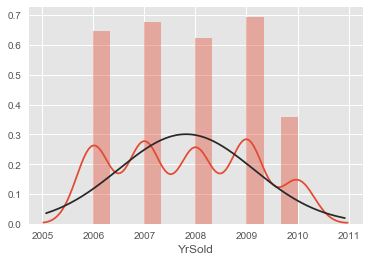

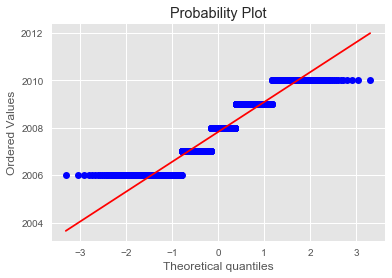

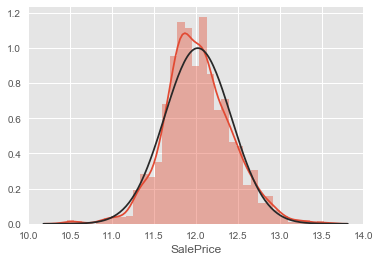

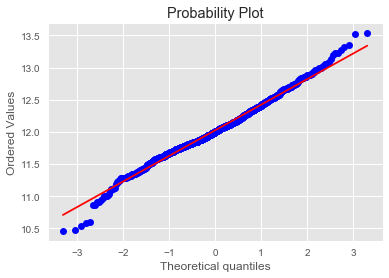

In [188]:


for f_i in range(0,numeric_df.shape[0]):
    if numeric_df.iloc[f_i,0] in traindata.columns:
        imp_avg = traindata[numeric_df.iloc[f_i,0]].mean()
        fig = plt.figure()
        if f_i in [-1]:
            traindata[numeric_df.iloc[f_i,0]] = np.log( traindata[numeric_df.iloc[f_i,0]].fillna(imp_avg) )
        else:
            traindata[numeric_df.iloc[f_i,0]] = traindata[numeric_df.iloc[f_i,0]].fillna(imp_avg)

        sns.distplot(traindata[numeric_df.iloc[f_i,0]], fit=norm);
        fig = plt.figure()
        res = stats.probplot( traindata[numeric_df.iloc[f_i,0]].fillna(imp_avg) , plot=plt)

# EDA: numeric predictors vs. SalePrice, scatterplot ############

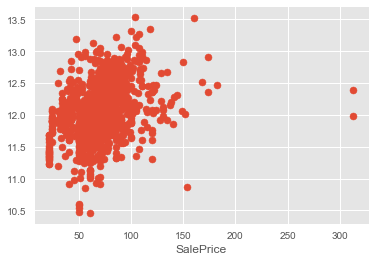

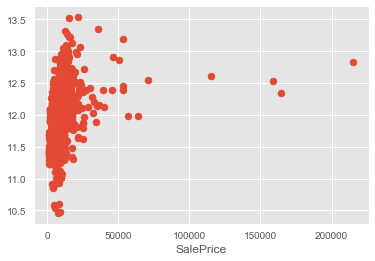

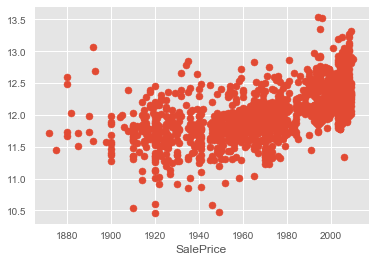

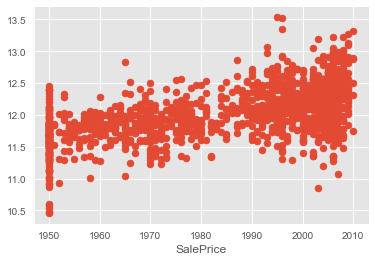

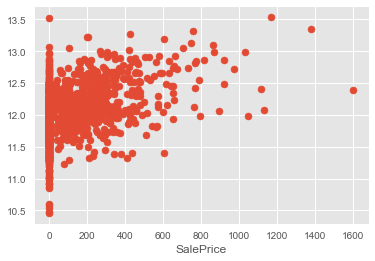

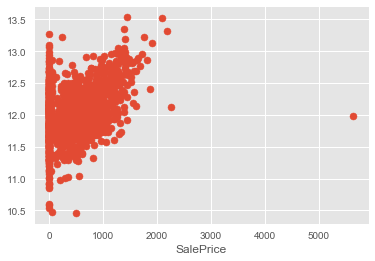

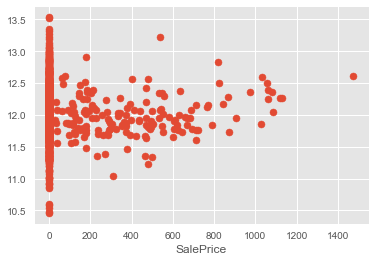

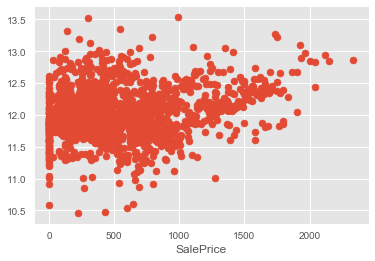

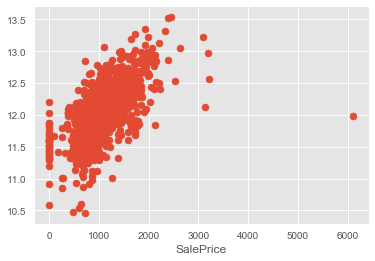

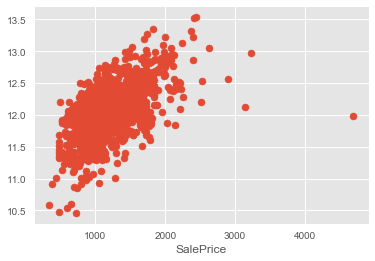

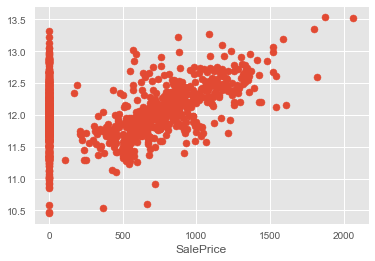

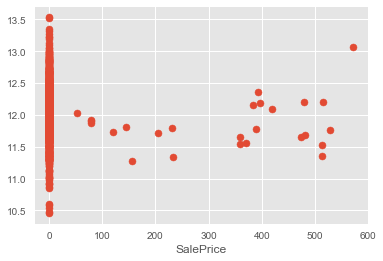

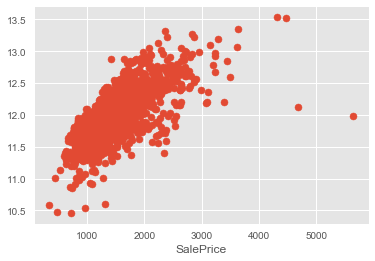

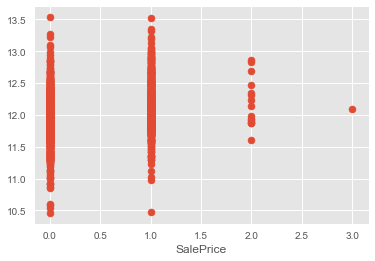

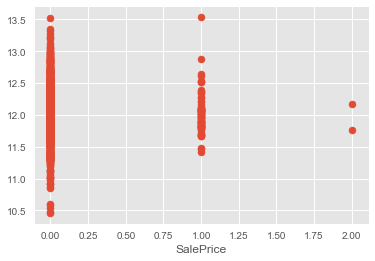

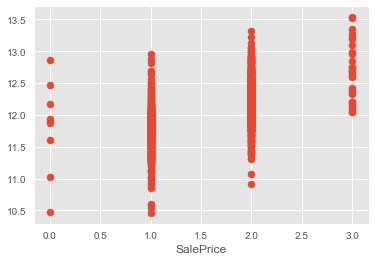

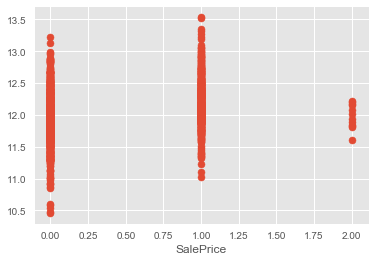

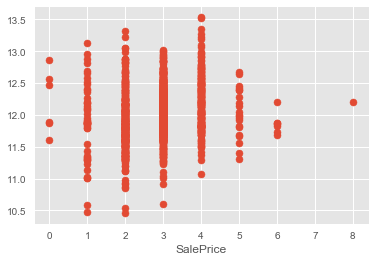

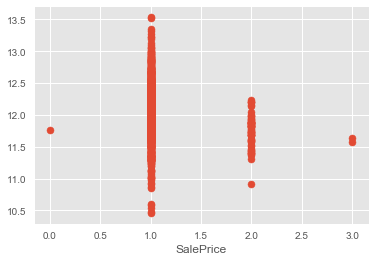

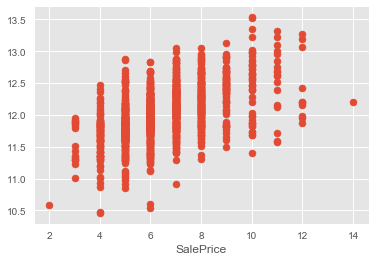

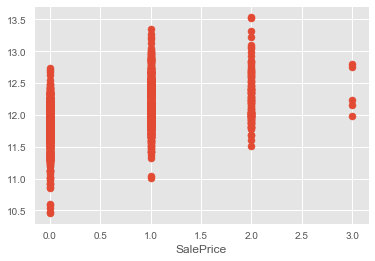

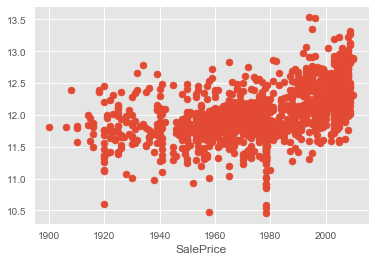

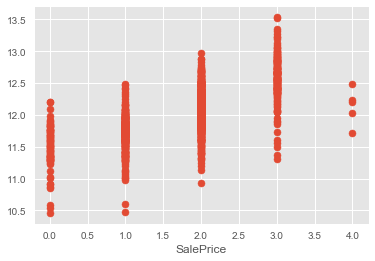

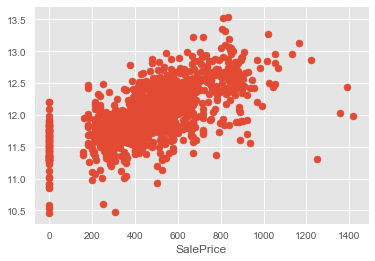

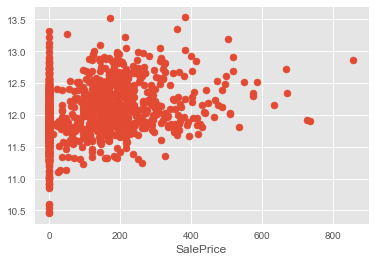

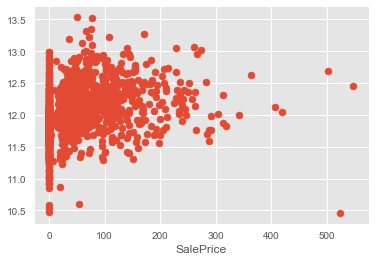

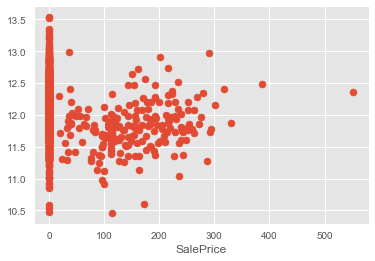

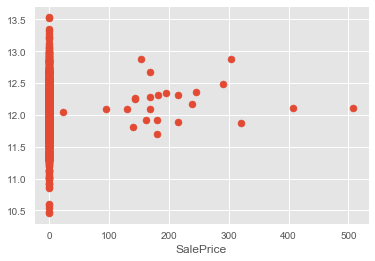

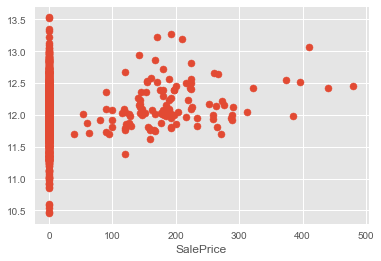

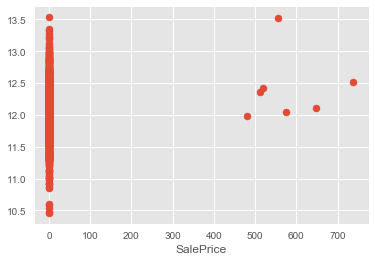

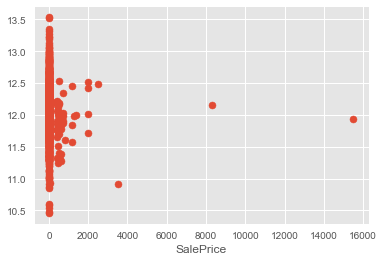

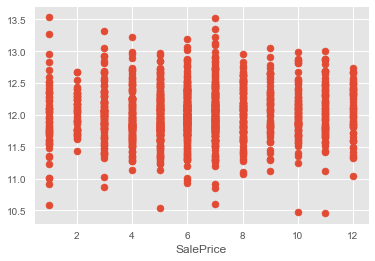

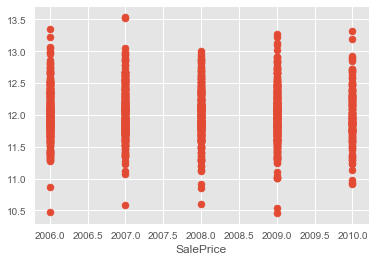

In [189]:
for f_i in range(0,numeric_df.shape[0]-1): # -1: last data is for SalePrice
    if numeric_df.iloc[f_i,0] in traindata.columns:
        imp_avg = traindata[numeric_df.iloc[f_i,0]].mean()
        fig = plt.figure()
        plt.scatter( traindata[numeric_df.iloc[f_i,0]].fillna(imp_avg), traindata['SalePrice']);
        plt.xlabel(numeric_df.iloc[f_i,0])
        plt.xlabel('SalePrice')

# EDA: Numeric predictor's correlation matrix

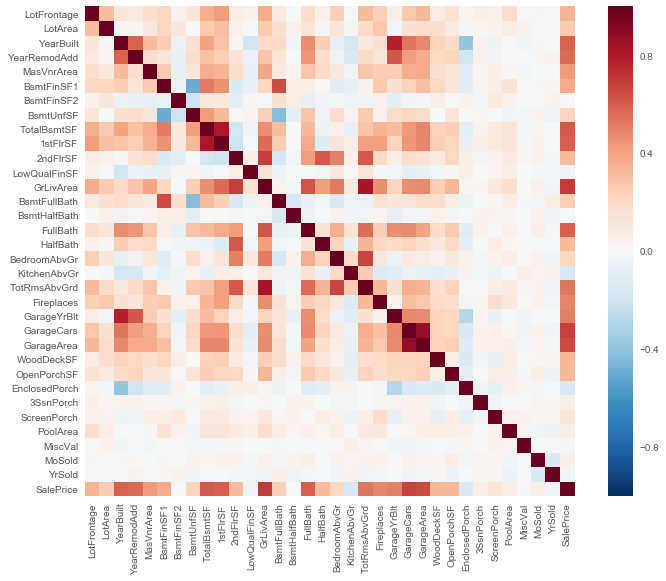

In [191]:
# correlation matrix
corrmat = traindata[numeric_df.Name].corr(method='pearson')

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True);

In [192]:
corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.306795,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.336156
LotArea,0.306795,1.000000,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
YearBuilt,0.117598,0.014228,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.082746,0.013788,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.179283,0.103960,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.429531
BsmtFinSF1,0.215828,0.214103,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,0.043340,0.111170,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832
BsmtUnfSF,0.122156,-0.002618,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.221985
TotalBsmtSF,0.363358,0.260833,0.391452,0.291066,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,0.414266,0.299475,0.281986,0.240379,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981


In [193]:
# corrmat.to_csv('./data/corrmat.csv')

# Numeric predictors showing correlation (with SalePrice) larger than threshold selected

In [194]:
cond= abs(corrmat.SalePrice) >=corr_thre

In [195]:
num_pred_thre_list= corrmat[cond].index.tolist()
print(num_pred_thre_list)

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [196]:
corrmat.SalePrice

LotFrontage      0.336156
LotArea          0.257320
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.429531
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209044
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
GarageYrBlt      0.500449
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057329
YrSold          -0.037263
SalePrice        1.000000
Name: SalePrice, dtype: float64

# EDA: box plot of nominal vs. saleprice ##################

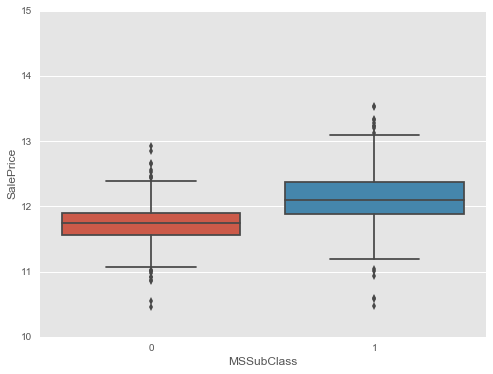

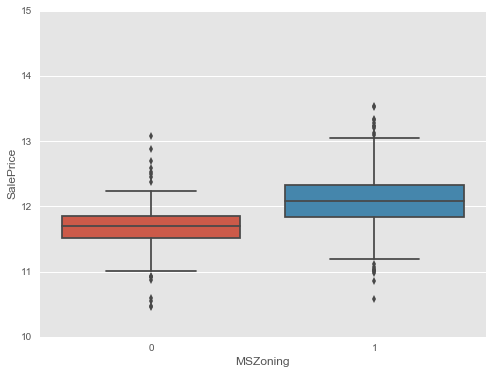

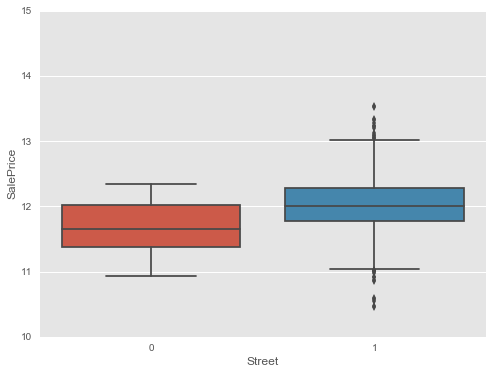

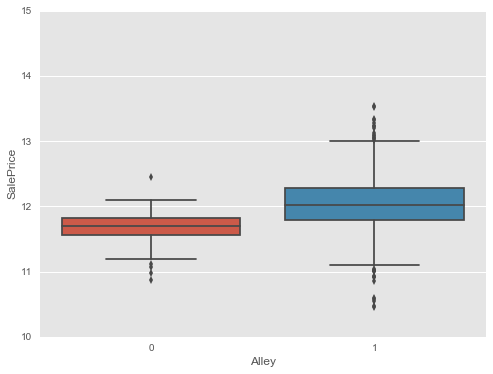

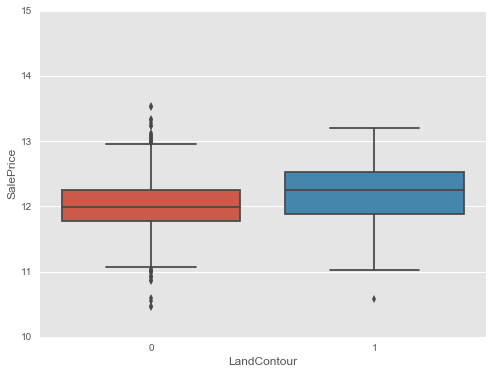

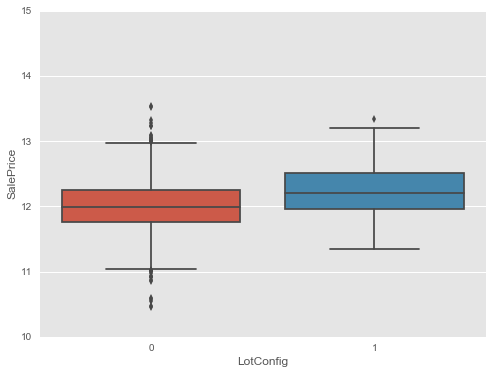

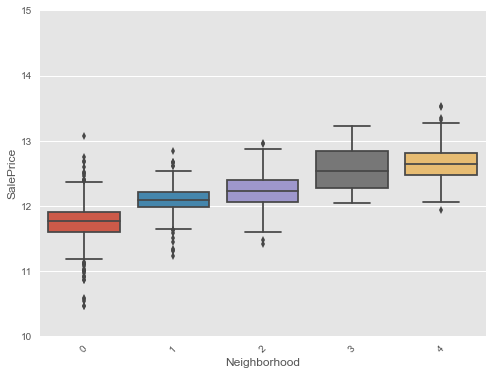

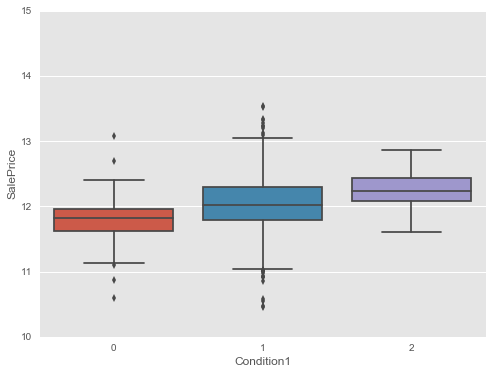

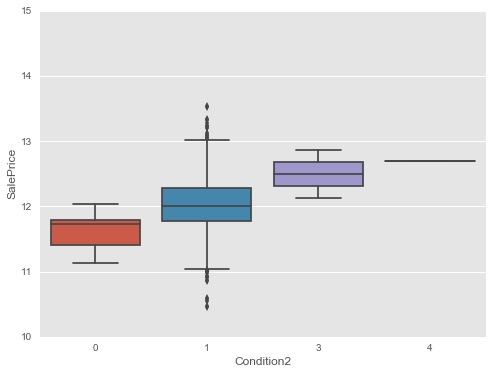

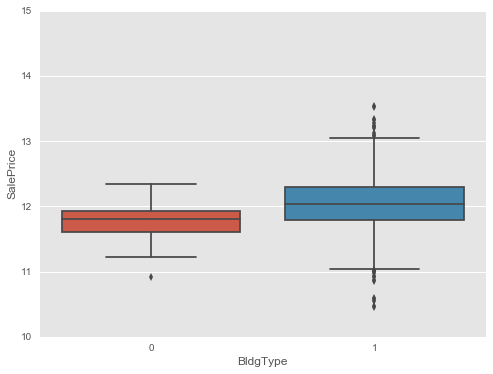

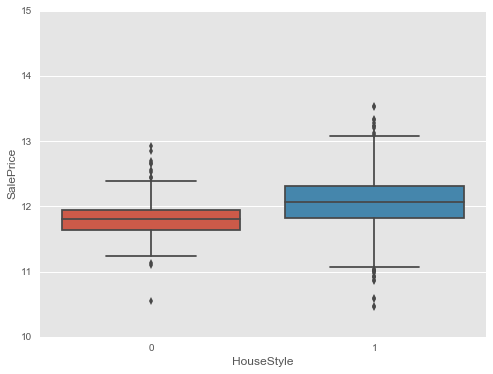

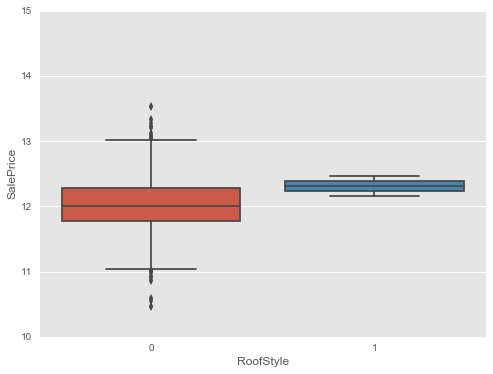

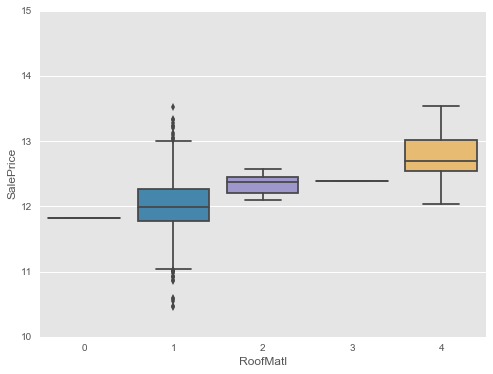

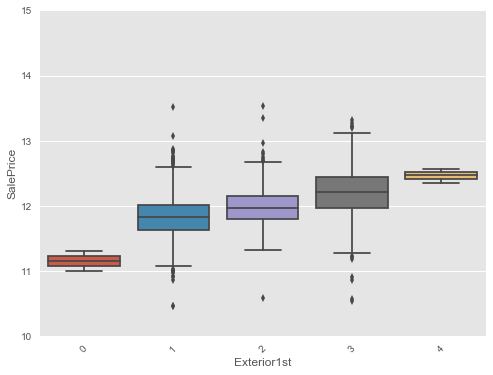

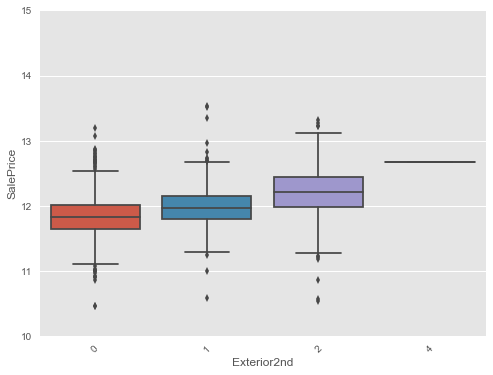

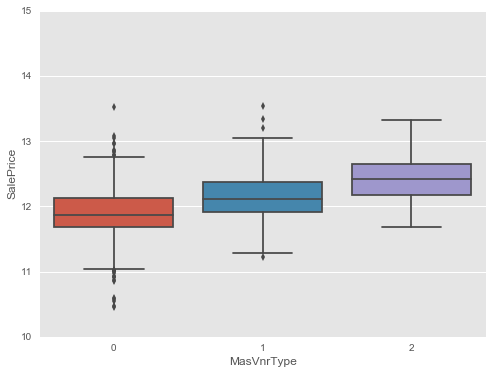

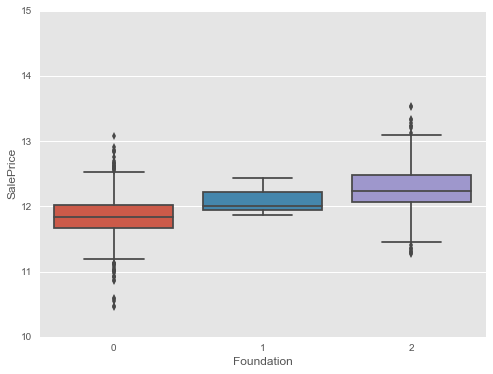

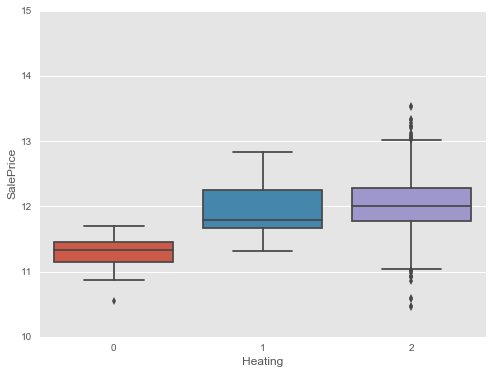

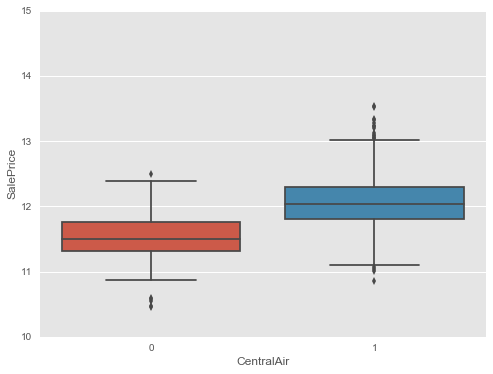

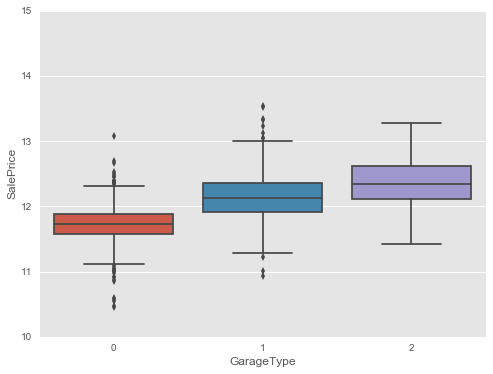

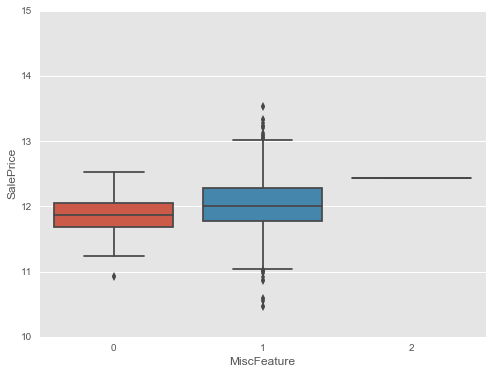

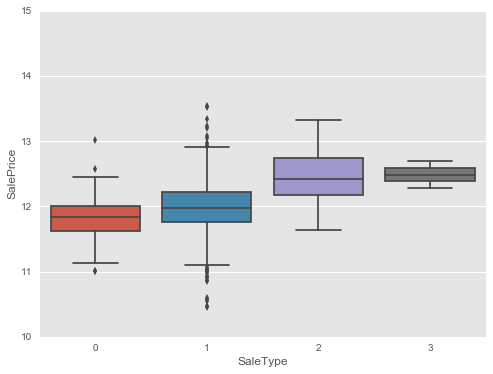

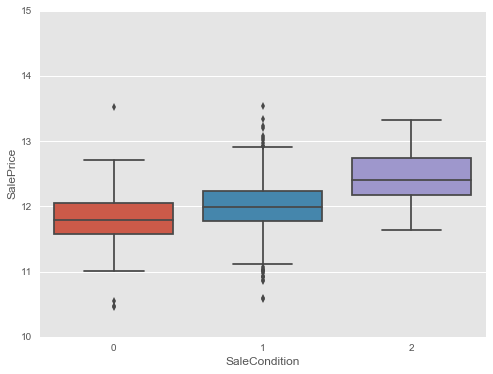

In [283]:
# nom_spear_corr = []
# nom_spear_pvalue= []
# predic_ = []

# for f_i in range(20,21):
yaxis_log = [10, 11, 12, 13, 14, 15]

for f_i in range(0,nominal_df.shape[0]): # -1: last data is for SalePrice
    if nominal_df.iloc[f_i,0] in traindata.columns:
        xy = traindata[[ nominal_df.iloc[f_i,0], 'SalePrice']]

        odr =xy.groupby([ nominal_df.iloc[f_i,0]]).agg( {'SalePrice':['median']} )
        odr.columns = odr.columns.droplevel(0)
        odr = odr.sort_values('median')

        x = xy.iloc[:,0]
        y = xy.iloc[:,1]

        f, ax = plt.subplots(figsize=(8, 6))
        fig = sns.boxplot(x=x, y=y, data=xy, order = odr.index)

        if (nominal_df.iloc[f_i,0] in ['Neighborhood', 'Exterior1st', 'Exterior2nd']):
            fig.set_xticklabels(ax.get_xticklabels(),rotation=45)
            
        # aa,bb= stats.spearmanr(x,y) 
        # nom_spear_corr.append(aa)
        # nom_spear_pvalue.append(bb)
        # predic_.append(nominal_df.iloc[f_i,0])

        fig.axis(ymin=min(yaxis_log), ymax=max(yaxis_log))
        fig.set( yticks=yaxis_log )      

In [199]:
# traindata_nom_ord = traindata[nominal_df.iloc[:,0]]

In [201]:
# pd.crosstab( traindata_nom_ord.iloc[:,0],traindata_nom_ord.iloc[:,1] )

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,2,13,3,508,10
30,2,0,1,33,33
40,0,0,0,2,2
45,0,0,1,4,7
50,4,0,1,88,51
60,0,25,0,273,1
70,1,0,3,30,26
75,0,0,0,6,10
80,0,0,0,58,0


# Simplification on nominal predictors

In [202]:
traindata.MSSubClass = traindata.MSSubClass.replace({ 180:0, \
30:0, 45:0, 190:0, 50:0, 90:0, 85:0, 40:0, 160:0,70:1, 20:1, 75:1, \
80:1, 120:1, 60:1, 150:1}) # Grvl: Gravel, Pave: Paved, NA: No alley access

traindata.MSZoning = traindata.MSZoning.replace( {"A": 0, "C (all)": 0, "FV":1, "I": 0, "RH": 0, "RL": 1, "RP": 1, "RM": 0} )

traindata.Street = traindata.Street.replace({"Grvl": 0, "Pave": 1})

traindata.Alley = traindata.Alley.replace({"Grvl": 0, "Pave": 1, 'NoAlleyAccess': 1})

traindata.LandContour = traindata.LandContour.replace({"Lvl": 0, "Bnk": 0, "HLS": 1, "Low": 1})

traindata.LotConfig = traindata.LotConfig.replace({"Inside":0, "Corner":0, "CulDSac":1, "FR2": 0, "FR3":1})

traindata.Neighborhood = traindata.Neighborhood.replace({"Blmngtn":1, "Blueste":0, "BrDale":0, \
   "BrkSide":0, "ClearCr":2, "CollgCr":2, "Crawfor":2, "Edwards":0, "Gilbert":1, \
   "IDOTRR":0, "MeadowV":0, "Mitchel":1, "NAmes":0, "NoRidge":4, "NPkVill":0, \
   "NridgHt":4, "NWAmes":1, "OldTown":0, "SWISU":0, "Sawyer":0,"SawyerW":1, \
   "Somerst":2, "StoneBr":3, "Timber":2, "Veenker":2})

traindata.Condition1 = traindata.Condition1.replace({"Artery":0, \
    "Feedr":0, "Norm":1, "RRNn":2, "RRAn":1, "PosN":2, "PosA":2, "RRNe":1, "RRAe":0 })

traindata.Condition2 = traindata.Condition2.replace({"Artery":0, \
    "Feedr":0, "Norm":1, "RRNn":0, "RRAn":0, "PosN":3, "PosA":4, "RRNe":1, "RRAe":1})

traindata.BldgType = traindata.BldgType.replace({"1Fam":1, "2fmCon":0, "Duplex":0, "TwnhsE":1, "Twnhs":0 })

traindata.HouseStyle = traindata.HouseStyle.replace({"1Story":1,"1.5Fin":0,"1.5Unf":0,"2Story":1,\
                                                     "2.5Fin":1,"2.5Unf":0,"SFoyer":0, "SLvl":1})

traindata.RoofStyle = traindata.RoofStyle.replace({"Flat":0, "Gable":0, "Gambrel":0, "Hip":0, "Mansard":0, "Shed":1})

traindata.RoofMatl = traindata.RoofMatl.replace({"ClyTile":1, "CompShg":1, "Membran":3, "Metal":2, "Roll":0, "Tar&Grv":1, "WdShake": 2, "WdShngl":4})

traindata.Exterior1st = traindata.Exterior1st.replace({\
    "AsbShng":1, "AsphShn":1, "BrkComm":0, "BrkFace":2, "CBlock":1, "CemntBd":3, \
    "HdBoard":2, "ImStucc":4, "MetalSd":1, "Other":1, "Plywood": 2, "PreCast": 1, \
    "Stone": 4, "Stucco":1, "VinylSd":3, "Wd Sdng":1, "WdShing":1 })

traindata.Exterior2nd = traindata.Exterior2nd.replace({"AsbShng":0, "AsphShn":0, "Brk Cmn":1,\
"BrkFace":1, "CBlock":0, "CmentBd":2, "HdBoard":1, "ImStucc":1,\
"MetalSd":0, "Other":4, "Plywood":1, "PreCast":1, \
"Stone":1, "Stucco":0, "VinylSd":2,"Wd Sdng":0, "Wd Shng":0 })

traindata.MasVnrType = traindata.MasVnrType.replace({\
        "BrkCmn":0, "BrkFace":1, "CBlock": 1, "None":0, "Stone":2, "NoMasonry":0})

traindata.Foundation = traindata.Foundation.replace({"BrkTil":0, "CBlock":0, "PConc":2, "Slab":0, "Stone":0, "Wood":1})

traindata.Heating = traindata.Heating.replace({"Floor":0, "GasA":2, "GasW":1, "Grav":0, "OthW":1, "Wall":0})

traindata.CentralAir = traindata.CentralAir.replace({"N":0, "Y":1})

traindata.GarageType = traindata.GarageType.replace({\
    "2Types":1, "Attchd":1, "Basment":1, "BuiltIn":2, "CarPort":0, "Detchd":0, "NoGarage": 0})

traindata.MiscFeature = traindata.MiscFeature.replace({\
       "Elev":1, "Gar2":1, "Othr":0, "Shed":0, "TenC":2, "NoMiscFeature": 1 })

traindata.SaleType = traindata.SaleType.replace({"WD":1, "CWD":1, "VWD":1, "New":2, "COD":0, "Con":3, "ConLw":0, "ConLI":0, "ConLD":0, "Oth":0})

traindata.SaleCondition = traindata.SaleCondition.replace({"Normal":1, "Abnorml":0, "AdjLand":0, "Alloca":1, "Family":0, "Partial":2})

In [203]:
# further simpliciation for nominal features

testdata.MSSubClass = testdata.MSSubClass.replace({ 180:0, \
30:0, 45:0, 190:0, 50:0, 90:0, 85:0, 40:0, 160:0,70:1, 20:1, 75:1, \
80:1, 120:1, 60:1, 150:1}) # Grvl: Gravel, Pave: Paved, NA: No alley access

testdata.MSZoning = testdata.MSZoning.replace( {"A": 0, "C (all)": 0, "FV":1, "I": 0, "RH": 0, "RL": 1, "RP": 1, "RM": 0} )

testdata.Street = testdata.Street.replace({"Grvl": 0, "Pave": 1})

testdata.Alley = testdata.Alley.replace({"Grvl": 0, "Pave": 1, 'NoAlleyAccess': 1})

testdata.LandContour = testdata.LandContour.replace({"Lvl": 0, "Bnk": 0, "HLS": 1, "Low": 1})

testdata.LotConfig = testdata.LotConfig.replace({"Inside":0, "Corner":0, "CulDSac":1, "FR2": 0, "FR3":1})

testdata.Neighborhood = testdata.Neighborhood.replace({"Blmngtn":1, "Blueste":0, "BrDale":0, \
   "BrkSide":0, "ClearCr":2, "CollgCr":2, "Crawfor":2, "Edwards":0, "Gilbert":1, \
   "IDOTRR":0, "MeadowV":0, "Mitchel":1, "NAmes":0, "NoRidge":4, "NPkVill":0, \
   "NridgHt":4, "NWAmes":1, "OldTown":0, "SWISU":0, "Sawyer":0,"SawyerW":1, \
   "Somerst":2, "StoneBr":3, "Timber":2, "Veenker":2})

testdata.Condition1 = testdata.Condition1.replace({"Artery":0, \
    "Feedr":0, "Norm":1, "RRNn":2, "RRAn":1, "PosN":2, "PosA":2, "RRNe":1, "RRAe":0 })

testdata.Condition2 = testdata.Condition2.replace({"Artery":0, \
    "Feedr":0, "Norm":1, "RRNn":0, "RRAn":0, "PosN":3, "PosA":4, "RRNe":1, "RRAe":1})

testdata.BldgType = testdata.BldgType.replace({"1Fam":1, "2fmCon":0, "Duplex":0, "TwnhsE":1, "Twnhs":0 })

testdata.HouseStyle = testdata.HouseStyle.replace({"1Story":1,"1.5Fin":0,"1.5Unf":0,"2Story":1,\
                                                     "2.5Fin":1,"2.5Unf":0,"SFoyer":0, "SLvl":1})

testdata.RoofStyle = testdata.RoofStyle.replace({"Flat":0, "Gable":0, "Gambrel":0, "Hip":0, "Mansard":0, "Shed":1})

testdata.RoofMatl = testdata.RoofMatl.replace({"ClyTile":1, "CompShg":1, "Membran":3, "Metal":2, "Roll":0, "Tar&Grv":1, "WdShake": 2, "WdShngl":4})

testdata.Exterior1st = testdata.Exterior1st.replace({\
    "AsbShng":1, "AsphShn":1, "BrkComm":0, "BrkFace":2, "CBlock":1, "CemntBd":3, \
    "HdBoard":2, "ImStucc":4, "MetalSd":1, "Other":1, "Plywood": 2, "PreCast": 1, \
    "Stone": 4, "Stucco":1, "VinylSd":3, "Wd Sdng":1, "WdShing":1 })

testdata.Exterior2nd = testdata.Exterior2nd.replace({"AsbShng":0, "AsphShn":0, "Brk Cmn":1,\
"BrkFace":1, "CBlock":0, "CmentBd":2, "HdBoard":1, "ImStucc":1,\
"MetalSd":0, "Other":4, "Plywood":1, "PreCast":1, \
"Stone":1, "Stucco":0, "VinylSd":2,"Wd Sdng":0, "Wd Shng":0 })

testdata.MasVnrType = testdata.MasVnrType.replace({\
        "BrkCmn":0, "BrkFace":1, "CBlock": 1, "None":0, "Stone":2, "NoMasonry":0})

testdata.Foundation = testdata.Foundation.replace({"BrkTil":0, "CBlock":0, "PConc":2, "Slab":0, "Stone":0, "Wood":1})

testdata.Heating = testdata.Heating.replace({"Floor":0, "GasA":2, "GasW":1, "Grav":0, "OthW":1, "Wall":0})

testdata.CentralAir = testdata.CentralAir.replace({"N":0, "Y":1})

testdata.GarageType = testdata.GarageType.replace({\
    "2Types":1, "Attchd":1, "Basment":1, "BuiltIn":2, "CarPort":0, "Detchd":0, "NoGarage": 0})

testdata.MiscFeature = testdata.MiscFeature.replace({\
       "Elev":1, "Gar2":1, "Othr":0, "Shed":0, "TenC":2, "NoMiscFeature": 1 })

testdata.SaleType = testdata.SaleType.replace({"WD":1, "CWD":1, "VWD":1, "New":2, "COD":0, "Con":3, "ConLw":0, "ConLI":0, "ConLD":0, "Oth":0})

testdata.SaleCondition = testdata.SaleCondition.replace({"Normal":1, "Abnorml":0, "AdjLand":0, "Alloca":1, "Family":0, "Partial":2})

In [204]:
traindata.to_csv("./data/traindata_smpl.csv")  

# EDA: box plot nominal vs. saleprice after simplification ##########

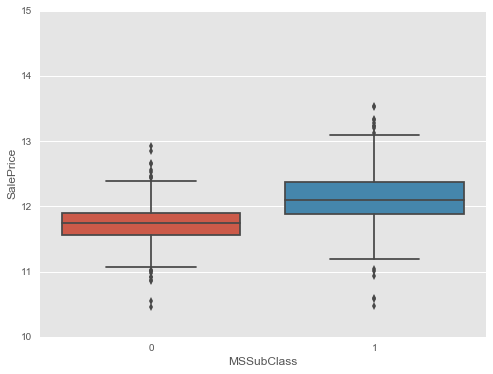

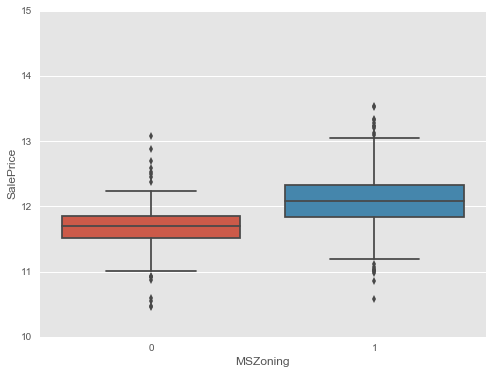

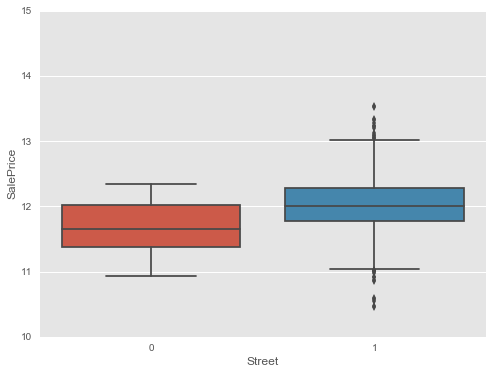

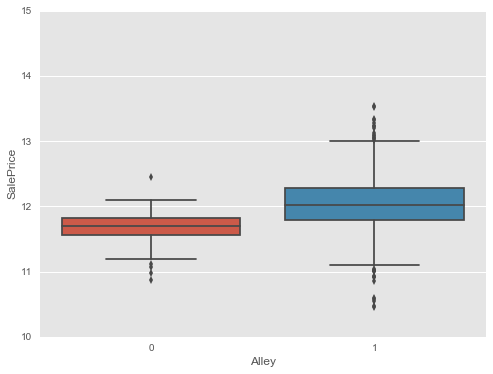

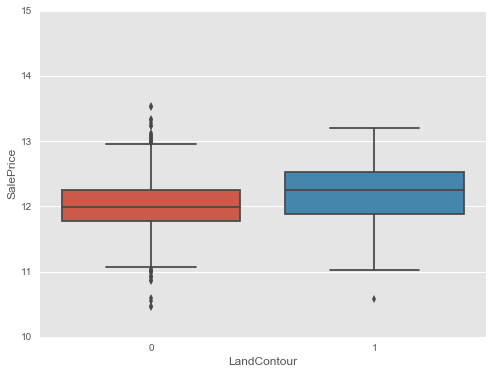

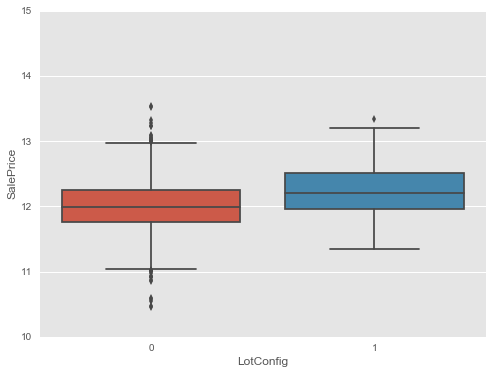

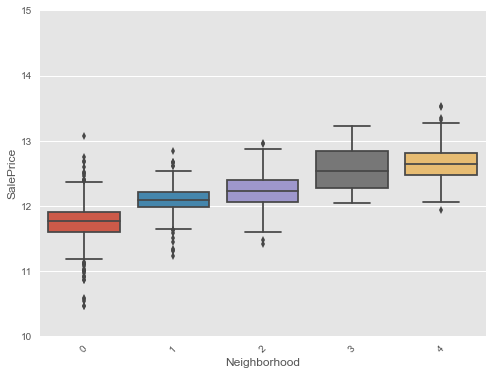

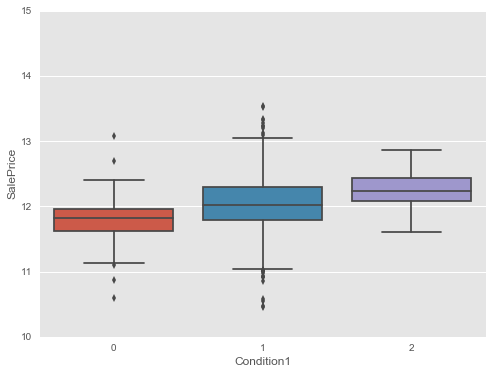

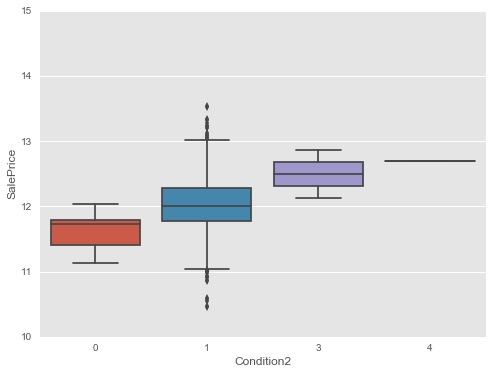

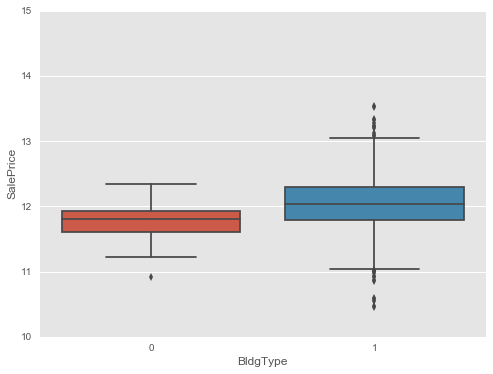

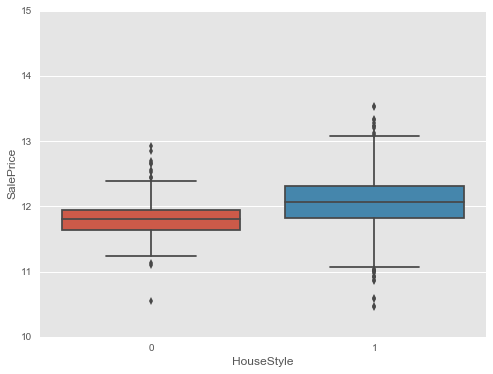

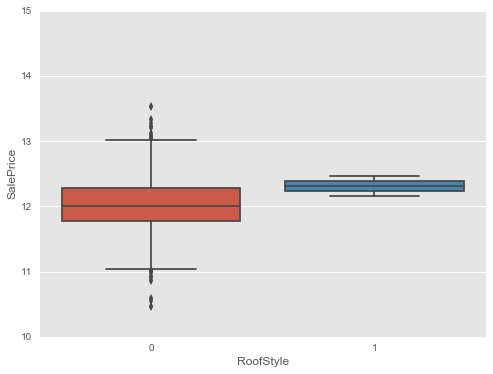

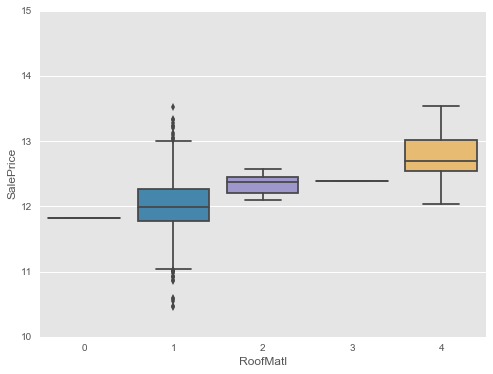

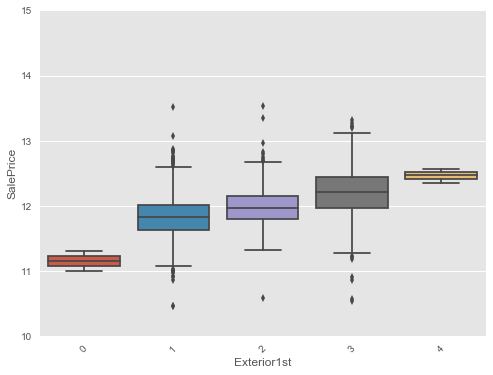

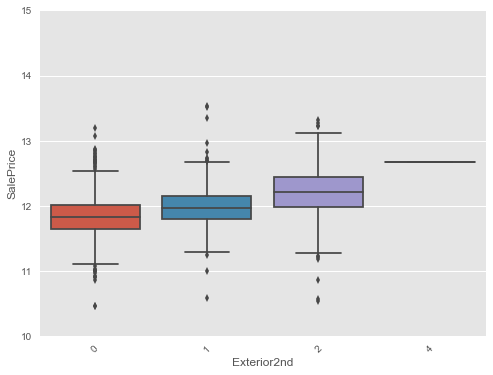

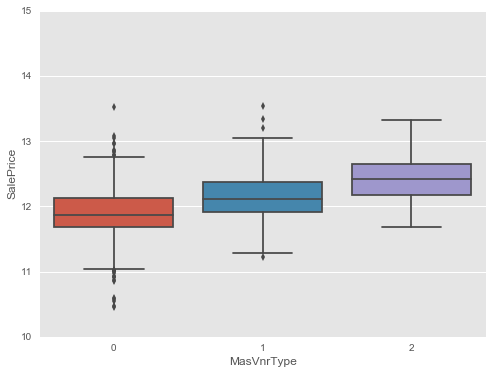

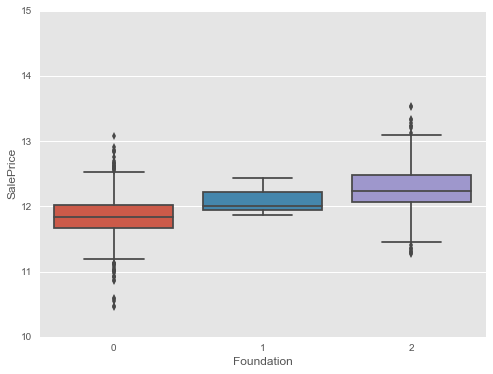

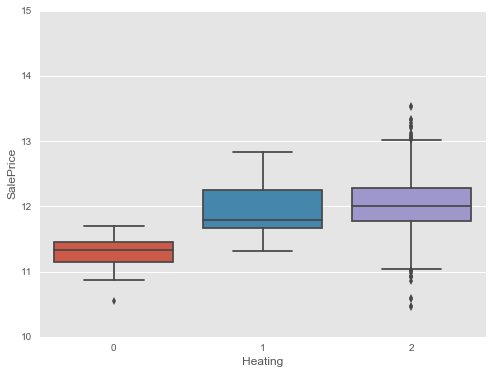

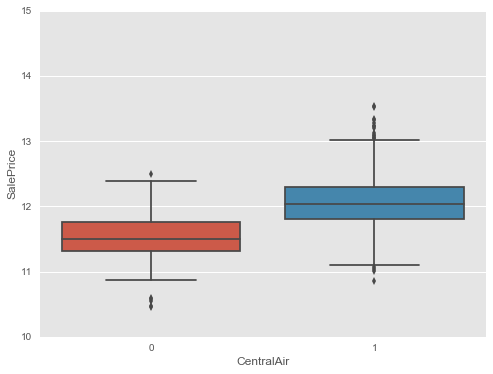

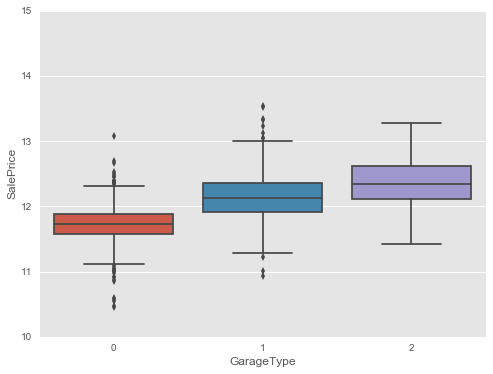

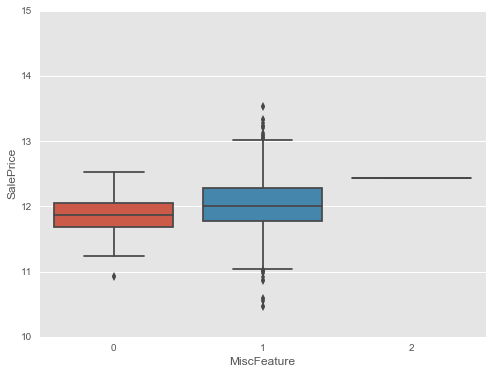

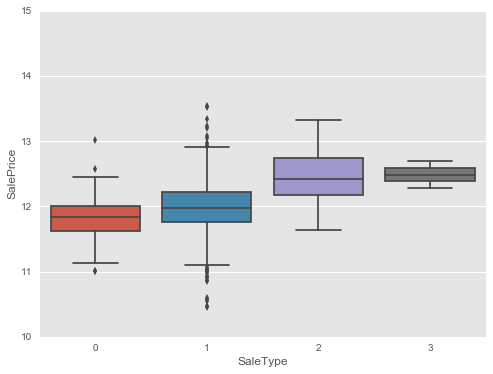

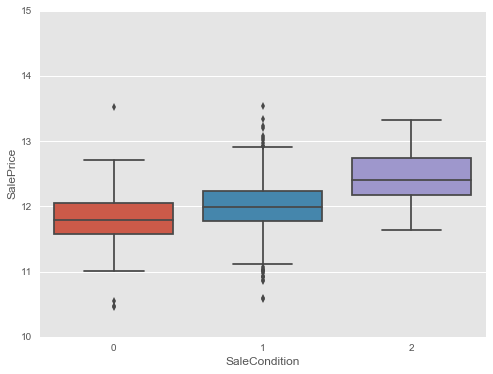

In [284]:
nom_spear_corr = []
nom_spear_pvalue= []
predic_ = []

yaxis_log = [10, 11, 12, 13, 14, 15]

for f_i in range(0,nominal_df.shape[0]): # -1: last data is for SalePrice
    if nominal_df.iloc[f_i,0] in traindata.columns:
        xy = traindata[[ nominal_df.iloc[f_i,0], 'SalePrice']]

        odr =xy.groupby([ nominal_df.iloc[f_i,0]]).agg( {'SalePrice':['median']} )
        odr.columns = odr.columns.droplevel(0)
        odr = odr.sort_values('median')

        x = xy.iloc[:,0]
        y = xy.iloc[:,1]

        f, ax = plt.subplots(figsize=(8, 6))
        fig = sns.boxplot(x=x, y=y, data=xy, order = odr.index)

        if (nominal_df.iloc[f_i,0] in ['Neighborhood', 'Exterior1st', 'Exterior2nd']):
            fig.set_xticklabels(ax.get_xticklabels(),rotation=45)
            
        aa,bb= stats.spearmanr(x,y) 
        nom_spear_corr.append(aa)
        nom_spear_pvalue.append(bb)
        predic_.append(nominal_df.iloc[f_i,0])

        # fig.axis(ymin=0, ymax=800000)
        # fig.set( yticks=[0, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 700000, 800000] )      
        
        fig.axis(ymin=min(yaxis_log), ymax=max(yaxis_log))
        fig.set( yticks=yaxis_log )  

# Spearson correlation, nominal(simplified) vs. saleprice, find predictors > corr threshold

['MSSubClass', 'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']


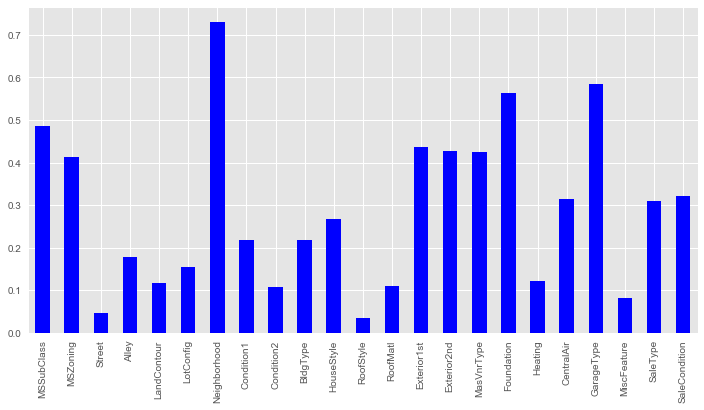

In [206]:
# correlation, nominal(coverted to ordinal) vs. saleprice
df_corr = pd.DataFrame( list(zip(nom_spear_corr, nom_spear_pvalue)), index =predic_, columns =['corr', 'pvalue'])

plt.figure(figsize=(12,6))
df_corr['corr'].plot.bar(color='b')

nom_pred_thre_list = df_corr.loc[abs(df_corr.iloc[:,0]) >=corr_thre].index.tolist()

print(nom_pred_thre_list)

In [207]:
df_corr.to_csv('./data/df_corr_nomvsSalePrice.csv')

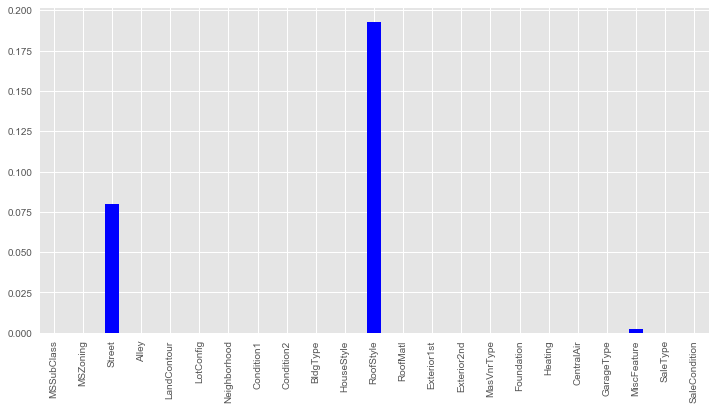

In [208]:
plt.figure(figsize=(12,6))
df_corr['pvalue'].plot.bar(color='b')

# EDA: box plot ordinal predictors vs saleprice

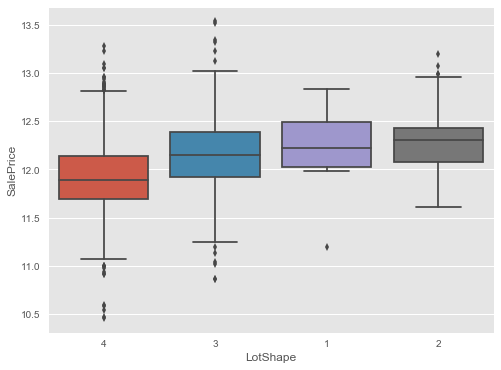

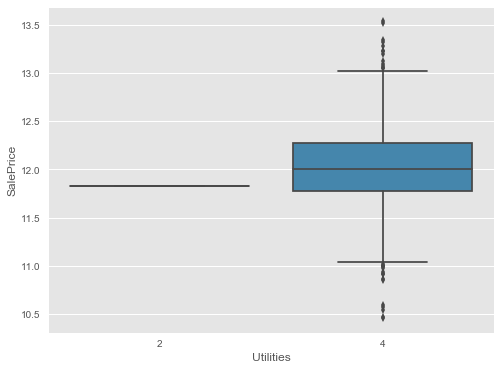

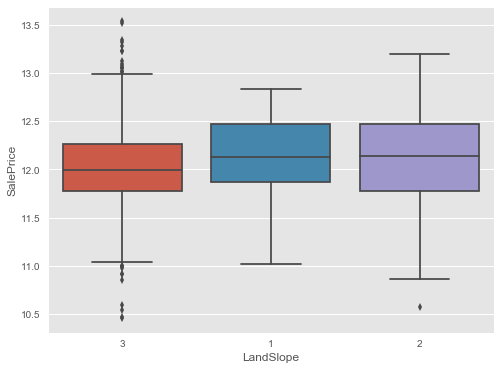

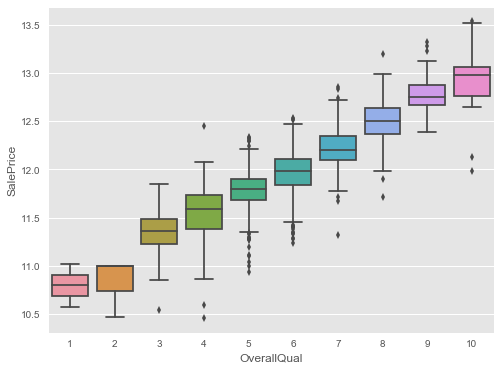

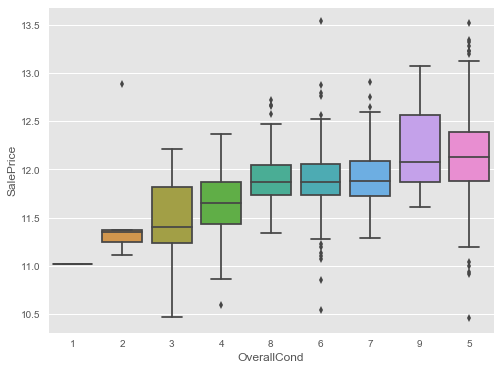

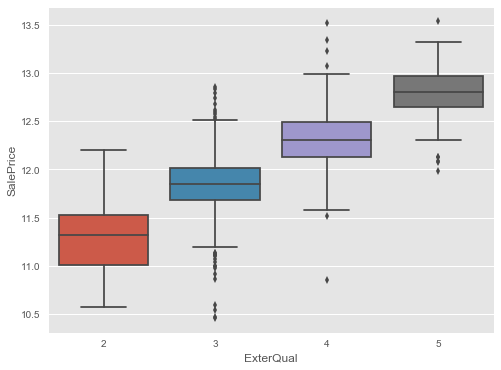

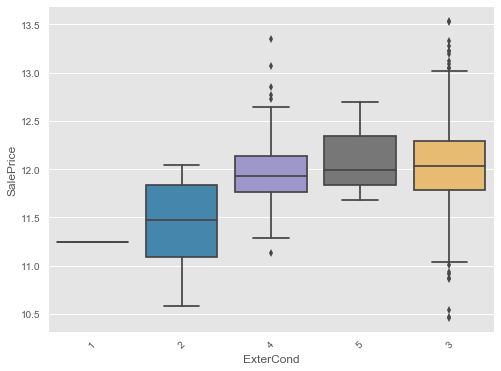

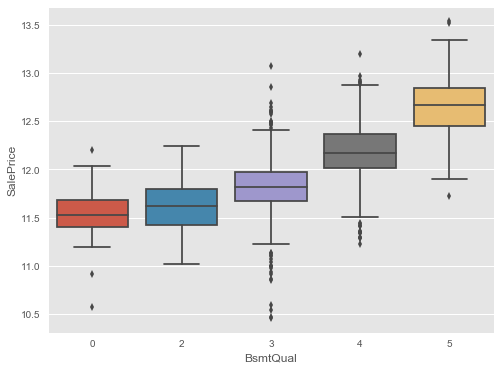

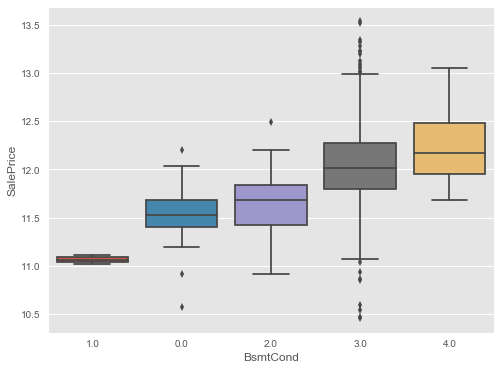

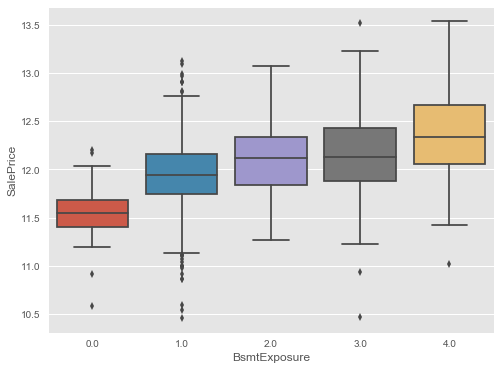

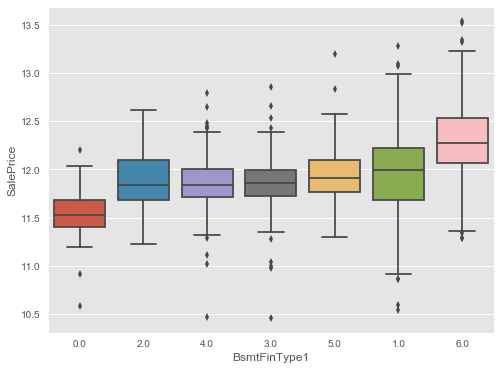

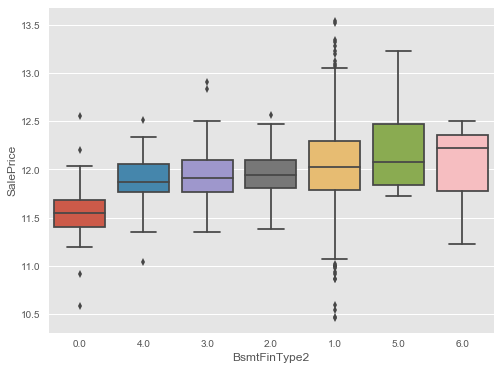

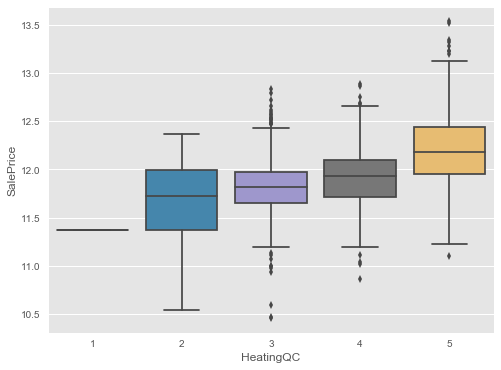

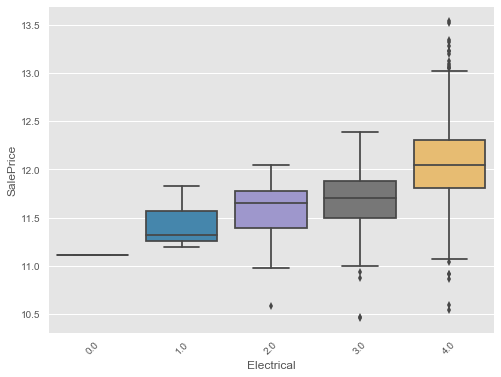

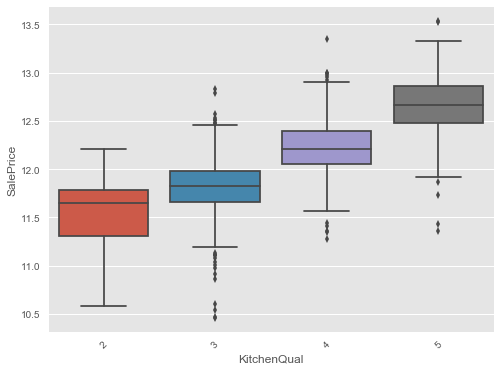

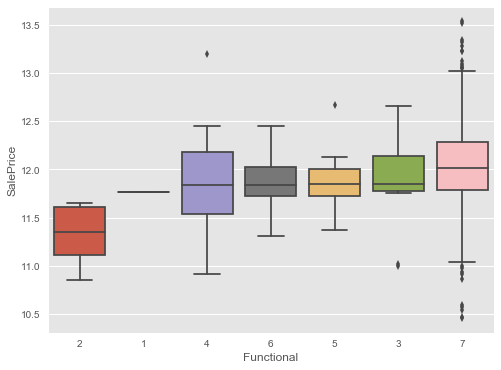

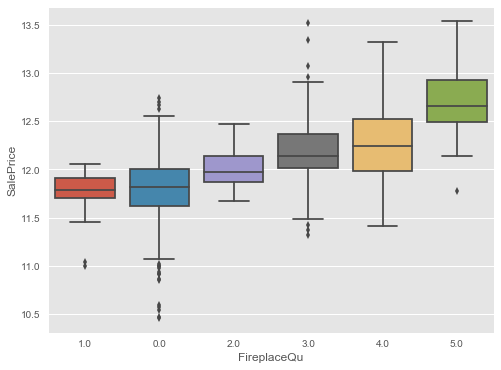

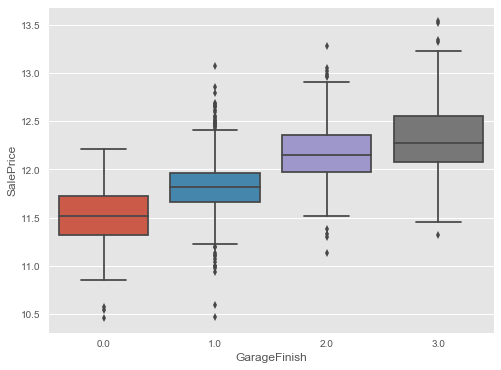

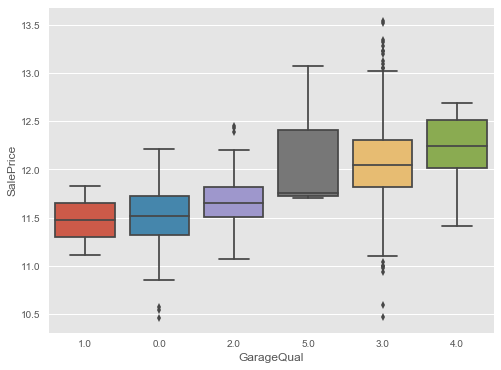

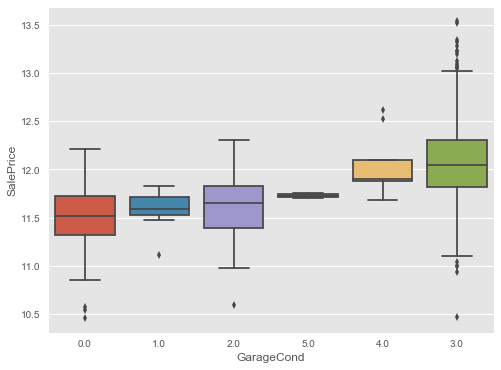

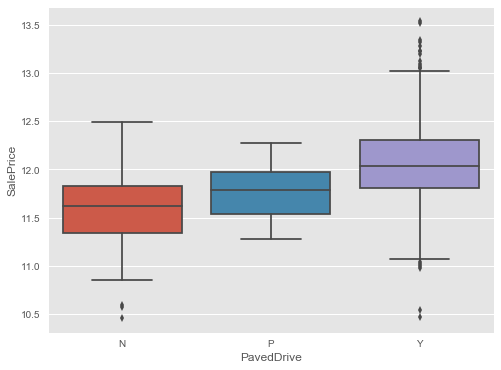

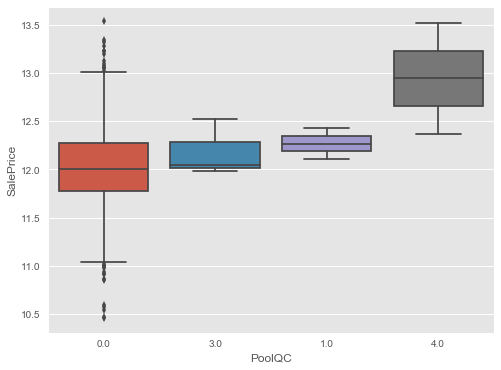

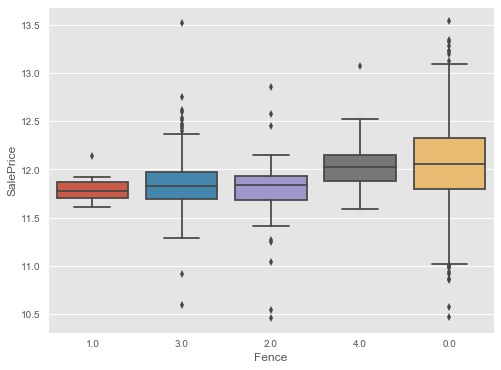

In [209]:
ordi_spear_corr = []
ordi_spear_pvalue = []
predic_ = []

for f_i in range(0,ordinal_df.shape[0]): # -1: last data is for SalePrice
    if ordinal_df.iloc[f_i,0] in traindata.columns:
        # imp_avg = traindata[numeric_df.iloc[f_i,0]].mean() 
        xy = traindata[[ ordinal_df.iloc[f_i,0], 'SalePrice']]

        odr =xy.groupby([ ordinal_df.iloc[f_i,0]]).agg( {'SalePrice':['median']} )
        odr.columns = odr.columns.droplevel(0)
        odr = odr.sort_values('median')

        x = xy.iloc[:,0]
        y = xy.iloc[:,1]

        aa,bb= stats.spearmanr(x,y) 
        ordi_spear_corr.append(aa)
        ordi_spear_pvalue.append(bb)
        predic_.append(ordinal_df.iloc[f_i,0])   

        f, ax = plt.subplots(figsize=(8, 6))
        fig = sns.boxplot(x=x, y=y, data=xy, order = odr.index)

        if (nominal_df.iloc[f_i,0] in ['Neighborhood', 'Exterior1st', 'Exterior2nd']):
            fig.set_xticklabels(ax.get_xticklabels(),rotation=45)

        # fig.axis(ymin=0, ymax=800000);

# Spearson correlation, ordinal vs. saleprice, find predictors > corr threshold

['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']


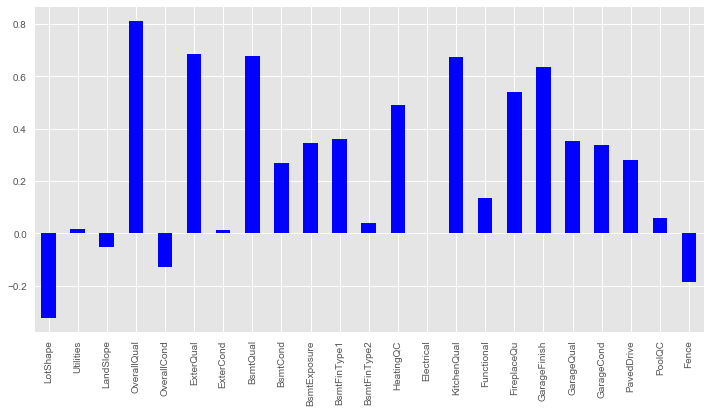

In [210]:
# correlation, nominal(coverted to ordinal) vs. saleprice

df_corr = pd.DataFrame( list(zip(ordi_spear_corr, ordi_spear_pvalue)), index =predic_, columns =['corr', 'pvalue'])
plt.figure(figsize=(12,6))
df_corr['corr'].plot.bar(color='b')

ordi_pred_thre_list = df_corr.loc[abs(df_corr.iloc[:,0]) >=corr_thre].index.tolist()

print(ordi_pred_thre_list)

In [211]:
df_corr.to_csv('./data/df_corr_ordvsSalePrice.csv')

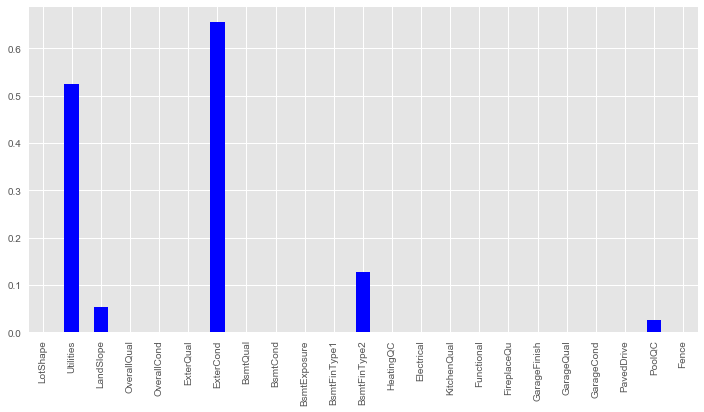

In [212]:
plt.figure(figsize=(12,6))
df_corr['pvalue'].plot.bar(color='b')

In [216]:
num_pred_thre_list

['YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [217]:
nom_pred_thre_list

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType']

In [218]:
ordi_pred_thre_list

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish']

In [219]:
################## manually defined for now ###############

# MultiColEnh = ['Exterior1st', 'Exterior2nd','TotalBsmtSF', 'GrLivArea', \
#                'GarageCars', 'GarageArea']

################## manually defined for now ###############

In [220]:
comb_list = num_pred_thre_list+nom_pred_thre_list+ordi_pred_thre_list
comb_list.remove('SalePrice') # mutating

# if( DoMultiColEnh=='Y' or DoMultiColEnh =='y'):
#    for ii in range(0, len(MultiColEnh) ):
#        if (MultiColEnh[ii] in comb_list):
#            comb_list.remove(MultiColEnh[ii])

if (UseBicAicOverwrite=='y' or UseBicAicOverwrite=='Y'):
    if (UseBicAicOverwriteChoice==1):
        comb_list = ['OverallQual','GrLivArea', 'YearBuilt','MSZoning','GarageCars','Neighborhood','TotalBsmtSF','YearRemodAdd','Fireplaces','MSSubClass','HeatingQC','BsmtQual','GarageYrBlt','KitchenQual','GarageFinish','1stFlrSF','GarageArea','TotRmsAbvGrd','Foundation'] 
    elif (UseBicAicOverwriteChoice==2):
         comb_list = ['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','MSSubClass','MSZoning','Neighborhood','Exterior1st','Exterior2nd', 'Foundation','OverallQual','BsmtQual','HeatingQC','KitchenQual','GarageFinish'  ]
    elif(UseBicAicOverwriteChoice==3):
        print('error 0001')
    elif(UseBicAicOverwriteChoice==4):
        print('error 0002')
    elif(UseBicAicOverwriteChoice==5):  
        comb_list = ['OverallQual','GrLivArea','YearBuilt','MSZoning', 'GarageCars','Neighborhood','TotalBsmtSF','YearRemodAdd', 'Fireplaces', 'MSSubClass','HeatingQC','BsmtQual','GarageYrBlt','KitchenQual','GarageFinish','1stFlrSF', 'GarageArea','TotRmsAbvGrd']
    elif(UseBicAicOverwriteChoice==6):
        comb_list = ['YearRemodAdd','1stFlrSF','GrLivArea','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt','GarageCars','GarageArea','MSSubClass','MSZoning','Neighborhood','OverallQual','BsmtQual','HeatingQC', 'KitchenQual', 'GarageFinish']
    elif(UseBicAicOverwriteChoice==7):   
        print('error 0003')        
    elif(UseBicAicOverwriteChoice==8): 
        print('error 0004')        

print(num_pred_thre_list)  # includes SalePrice
print(nom_pred_thre_list)
print(ordi_pred_thre_list)
print(comb_list)

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
['MSSubClass', 'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']
['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']
['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSSubClass', 'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']


In [221]:
len(comb_list)

27

# shortened dataframe according to corr > threshold

In [222]:
traindata_sh = traindata[comb_list+['SalePrice']]

In [223]:
traindata_sh.to_csv('./data/traindata_smpl_sh.csv')

In [224]:
testdata_sh = testdata[comb_list] # We do not have SalePrice in testdata...

In [225]:
n_unique =traindata_sh.nunique() 
null_perc = traindata_sh.isnull().sum()/traindata_sh.shape[0]*100
NA_perc = traindata_sh.isnull().sum()/traindata_sh.shape[0]*100

trdata_sh_analysis = pd.DataFrame({'n_unique': n_unique, 'null_perc': null_perc, 'NA_perc': NA_perc})

In [226]:
trdata_sh_analysis[NA_perc>0]

,n_unique,null_perc,NA_perc


In [227]:
n_unique =testdata_sh.nunique() 
null_perc = testdata_sh.isnull().sum()/testdata_sh.shape[0]*100
NA_perc = testdata_sh.isnull().sum()/testdata_sh.shape[0]*100

testdata_sh_analysis = pd.DataFrame({'n_unique': n_unique, 'null_perc': null_perc, 'NA_perc': NA_perc})

In [228]:
testdata_sh_analysis

,n_unique,null_perc,NA_perc
YearBuilt,106,0.000000,0.000000
YearRemodAdd,61,0.000000,0.000000
MasVnrArea,303,1.028101,1.028101
TotalBsmtSF,736,0.068540,0.068540
1stFlrSF,789,0.000000,0.000000
GrLivArea,879,0.000000,0.000000
FullBath,5,0.000000,0.000000
TotRmsAbvGrd,12,0.000000,0.000000
Fireplaces,5,0.000000,0.000000
GarageYrBlt,97,5.346127,5.346127


# Imputation on test(shortened) data. Imputation on training(shortened) data is not needed. 

In [229]:
# from fancyimpute import KNN

In [230]:


if 'MSZoning' in testdata_sh.columns:
    imp_med = testdata_sh.MSZoning.median()
    testdata_sh.MSZoning = testdata_sh.MSZoning.fillna(imp_med)

if 'Exterior1st' in testdata_sh.columns:
    imp_med = testdata_sh.Exterior1st.median()
    testdata_sh.Exterior1st = testdata_sh.Exterior1st.fillna(imp_med)

if 'Exterior2nd' in testdata_sh.columns:    
    imp_med = testdata_sh.Exterior2nd.median()
    testdata_sh.Exterior2nd = testdata_sh.Exterior2nd.fillna(imp_med)

In [231]:


if 'GarageYrBlt' in testdata_sh.columns:     
    imp_mean = testdata_sh.GarageYrBlt.mean()
    # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.GarageYrBlt) 
    testdata_sh.GarageYrBlt = testdata_sh.GarageYrBlt.fillna(imp_mean)

if 'TotalBsmtSF' in testdata_sh.columns:     
    imp_mean = testdata_sh.TotalBsmtSF.mean()
    # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.TotalBsmtSF) 
    testdata_sh.TotalBsmtSF = testdata_sh.TotalBsmtSF.fillna(imp_mean)

if 'GarageCars' in testdata_sh.columns:     
    imp_mean = testdata_sh.GarageCars.mean()
    # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.GarageCars) 
    testdata_sh.GarageCars = testdata_sh.GarageCars.fillna(imp_mean)

if 'GarageArea' in testdata_sh.columns:     
    imp_mean = testdata_sh.GarageArea.mean()
    # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.GarageArea) 
    testdata_sh.GarageArea = testdata_sh.GarageArea.fillna(imp_mean)

if 'MasVnrArea' in testdata_sh.columns:     
    imp_mean = testdata_sh.MasVnrArea.mean()
    # imp_mean_knn = KNN(k=5).fit_transform(testdata_sh.MasVnrArea) 
    testdata_sh.MasVnrArea = testdata_sh.MasVnrArea.fillna(imp_mean)

In [232]:
n_unique =testdata_sh.nunique() 
null_perc = testdata_sh.isnull().sum()/testdata_sh.shape[0]*100
NA_perc = testdata_sh.isnull().sum()/testdata_sh.shape[0]*100

testdata_sh_analysis = pd.DataFrame({'n_unique': n_unique, 'null_perc': null_perc, 'NA_perc': NA_perc})

In [233]:
testdata_sh_analysis[NA_perc>0]

,n_unique,null_perc,NA_perc


In [234]:
x1 = traindata_sh[comb_list] # excluded SalePrice

In [235]:
y1 = traindata_sh.SalePrice  

In [236]:
x2= testdata_sh[comb_list] # we do not have SalePrice of the test data 

# Perform data standardization on numeric predictors

In [237]:
if (DoNormalization=='Y' or DoNormalization=='y'):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 
    import statsmodels.api as sm 

    scaleType = 'standard'
    if scaleType not in ['standard', 'minmax', 'maxabs']: 
        raise ValueError('%s is not a valid choice' %(scaleType))
    if scaleType == 'standard':
        scaler = StandardScaler()
    elif scaleType == 'minmax':
        scaler = MinMaxScaler()
    elif scaleType == 'maxabs':
        scaler = MaxAbsScaler()
        
    temp_list = list( set(num_pred_thre_list.copy()) & set(comb_list) )
        # since, comb_list could have been already downselected
    if( 'SalePrice' in temp_list ):
        temp_list.remove('SalePrice')
    temp_x1 = traindata_sh[temp_list] # part of x1 extracted for normalization
    scaler.fit(temp_x1) # only numerical predictors, except for SalePrice, is input
                        # Fix the scale model using the train set
    
    x1[temp_list] = scaler.transform(x1[temp_list])
    traindata_sh[temp_list] = scaler.transform(traindata_sh[temp_list])
 
    ############
    temp_x2 = testdata_sh[temp_list].copy() # part of x1 extracted for normalization
    scaler.fit(temp_x2) # only numerical predictors, except for SalePrice, is input
                        # Fix the scale model using the train set
    x2[temp_list] = scaler.transform(x2[temp_list])
    testdata_sh[temp_list] = scaler.transform(testdata_sh[temp_list])
    
    ############
    traindata_smpl_std = traindata.copy()
    temp_list = list( set(numeric_df.values.flatten().tolist()) & set(comb_list) )
        # since, comb_list could have been already downselected    
    if( 'SalePrice' in temp_list ):    
        temp_list.remove('SalePrice')
    scaler.fit(traindata_smpl_std[temp_list] ) # only numerical predictors, except for SalePrice, is input
                        # Fix the scale model using the train set

    traindata_smpl_std[temp_list] = scaler.transform(traindata_smpl_std[temp_list])    
    
    del temp_list
    del temp_x1       
    del temp_x2

In [238]:
traindata_sh.to_csv('./data/traindata_smpl_sh_std.csv')

In [239]:
traindata_smpl_std.to_csv('./data/traindata_smpl_std.csv')

# MLR: Detecting Multicollinearity Among Numerical Features

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

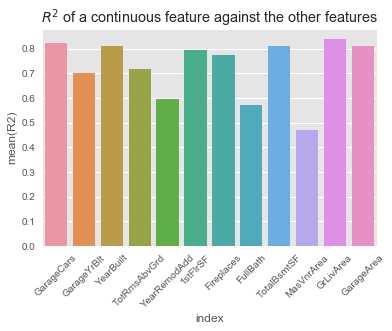

In [240]:
from sklearn import linear_model
scores = {}
ols2 = linear_model.LinearRegression()
from sklearn.metrics import r2_score
cont_features = num_pred_thre_list.copy()
cont_features.remove('SalePrice')

# sns.set(rc={'figure.figsize':(11.7,8.27)})

for feature_name in list(set(cont_features) & set(comb_list)):
    traindata_sh2     = traindata_sh.copy()
    feature = traindata_sh2[feature_name].copy()
    traindata_sh2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(traindata_sh2, feature)
    scores[feature_name] = ols2.score(traindata_sh2, feature)  
# plt.figure(figsize=(11,8))
gg = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
plt.title('$R^2$ of a continuous feature against the other features')

# MLR: Detecting Multicollinearity Among Features (Numerical, Nominal, Ordinal)

In [241]:
####### test codes #######
if 0: 
    from sklearn import linear_model
    scores = {}
    ols2 = linear_model.LinearRegression()
    from sklearn.metrics import r2_score

    traindata_sh2     = traindata_sh.copy()
    traindata_sh2.drop('GarageArea', axis=1, inplace=True)


    for feature_name in traindata_sh2.columns:
        traindata_sh3     = traindata_sh2.copy()
        feature = traindata_sh3[feature_name].copy()
        traindata_sh3.drop(feature_name, axis=1, inplace=True)
        ols2.fit(traindata_sh3, feature)
        scores[feature_name] = ols2.score(traindata_sh3, feature)  

    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)

    gg = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
    gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
    plt.title('$R^2$ of a feature(numerical, ordinal, nominal) against all the other features')

Text(0.5, 1.0, '$R^2$ of a feature(numerical, ordinal, nominal) against all the other features')

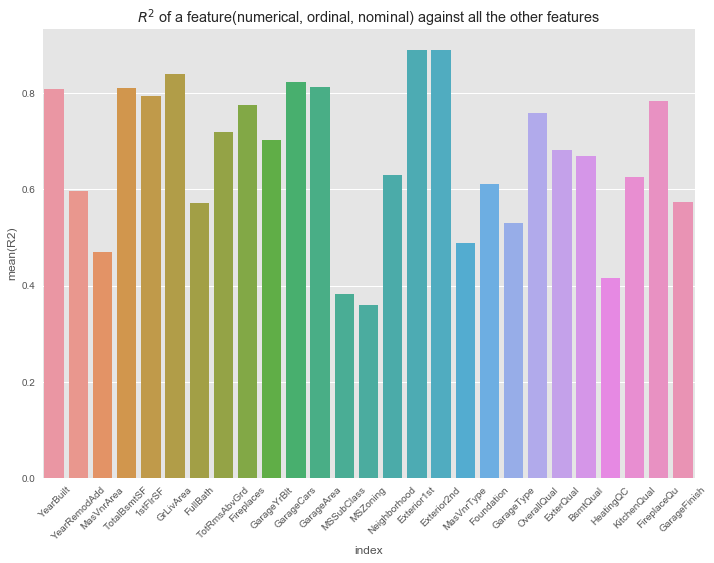

In [242]:
from sklearn import linear_model
scores = {}
ols2 = linear_model.LinearRegression()
from sklearn.metrics import r2_score

# sns.set(rc={'figure.figsize':(11.7,8.27)})


for feature_name in comb_list:
    traindata_sh2     = traindata_sh.copy()
    feature = traindata_sh2[feature_name].copy()
    traindata_sh2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(traindata_sh2, feature)
    scores[feature_name] = ols2.score(traindata_sh2, feature)  

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
    
gg = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
plt.title('$R^2$ of a feature(numerical, ordinal, nominal) against all the other features')


In [243]:
# if (DoMultiColEnh=='y' or DoMultiColEnh=='Y'):
#     pred_sset_multicol = dict((k, v) for k, v in scores.items() if v >= MultiCol_R2_thre)
#     pred_sset_multicol = list(pred_sset_multicol.keys())
#     print(pred_sset_multicol)

In [244]:
################## testcodes ###############
pred_sset_multicol = ['TotalBsmtSF', 'GrLivArea', 'GarageArea', \
                      'YearBlt', 'Exterior1st', 'Exterior2nd']

In [245]:
if( DoMultiColEnh=='Y' or DoMultiColEnh =='y'):
    for ii in range(0, len(pred_sset_multicol) ):
        if (pred_sset_multicol[ii] in x1.columns):
            x1=x1.drop(pred_sset_multicol[ii], axis=1)
        if (pred_sset_multicol[ii] in x2.columns):
            x2=x2.drop(pred_sset_multicol[ii], axis=1)            

# MLR (Multiple Linear Regression)

In [246]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x1, y1)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x1) - y1) ** 2))
print("R^2: %.5f" % ols.score(x1, y1))

beta_1, beta_2: [ 0.012  0.035  0.002  0.014  0.02   0.085  0.     0.015  0.031 -0.022
  0.035  0.019  0.049  0.111  0.044  0.023 -0.024 -0.004 -0.01   0.007
  0.066 -0.006  0.039  0.021  0.035  0.001  0.017]
beta_0: 11.079
RSS: 31.93
R^2: 0.86285


In [247]:
comp_metric_tr = np.sqrt(   np.mean(  (y1 - ols.predict(x1))**2  )   )

print(comp_metric_tr)

0.14788168293885431


# MLR (Multiple Linear Regression with CV

In [248]:
# import sklearn.cross_validation as cv
import sklearn.model_selection as ms

# import sklearn.cross_validation as cv

# cv_k3s = cv.StratifiedKFold(y1, n_folds=N_folds)
ms_k3 = ms.KFold(n_splits=N_folds)
# cv_k3 = cv.KFold(len(y1), n_folds=N_folds)

comp_metric_tr = []
comp_metric_val = []
n_tr = []
n_val = []
RSS_tr = []
RSS_val = []
R2_tr = []
R2_val = []

ols = linear_model.LinearRegression()

# for train_idx, val_idx in cv_k3:
for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
    ols.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
    n_tr.append( len(train_idx) )
    n_val.append( len(val_idx) )
    comp_metric_tr.append(np.sqrt(   np.mean(  (y1.iloc[train_idx] - ols.predict(x1.iloc[train_idx,]))**2  )   ))
    comp_metric_val.append(np.sqrt(   np.mean(  (y1.iloc[val_idx] - ols.predict(x1.iloc[val_idx,]))**2  )   ))
    RSS_tr.append(   np.sum((ols.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) )
    RSS_val.append(   np.sum((ols.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) )
    R2_tr.append( ols.score(x1.iloc[train_idx,], y1.iloc[train_idx])) 
    R2_val.append( ols.score(x1.iloc[val_idx,], y1.iloc[val_idx])) 


In [249]:
comp_metric_tr_all = np.sum(comp_metric_tr*np.sqrt(n_tr)/sum(np.sqrt(n_tr)))
print(comp_metric_tr_all)

comp_metric_val_all = np.sum(comp_metric_val*np.sqrt(n_val)/sum(np.sqrt(n_val)))
print(comp_metric_val_all)

0.1472785577843057
0.15320730563718243


# MLR (Multiple Linear Regression with CV2

In [250]:
# logit = linear_model.LogisticRegression()
# ols = linear_model.LinearRegression()

# scores = ms.cross_val_score(estimator=ols, X=iris.data, y=iris.target, cv=5)

# print('Scores: {}'.format(scores))
# print('Score mean: {}'.format(scores.mean()))
# print('Score std deviation: {}'.format(scores.std()))

# stratify_divide = cv.StratifiedKFold(y=y1, n_folds=N_folds, random_state=0)
# scores = cv.cross_val_score(estimator=ols, X=x1, y=y1, cv=stratify_divide)
# scores # lsw) R2 is returned 

NameError: name 'cv' is not defined

# MLR: Find significance of slope coefficients after MLR

In [ ]:
x1_add_const = sm.add_constant(x1)
ols = sm.OLS(y1, x1_add_const)
ans = ols.fit()
print(ans.summary())

In [ ]:
# test codes

#np.isnan(traindata.Alley[17])
#pd.isna(traindata.MasVnrType[11])
#pd.isna(traindata.MasVnrType[244])
#traindata.MasVnrType[11]
#traindata.MasVnrType[11]=="None"
#isnone( traindata.MasVnrType[0] )

In [ ]:
# x1_add_const = sm.add_constant(x1)
# ols = sm.OLS(y1, x1_add_const)
# ans = ols.fit()
# print(ans.summary())

# Import and definition for linear regressions

In [89]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

# Ridge Regression

In [ ]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,100.001,100)

comp_metric_tr = []
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)
    ridge.fit(x1, y1)
    intercepts.append(ridge.intercept_)
    coefs.append(ridge.coef_)
    R2.append(ridge.score(x1, y1))  
    comp_metric_tr.append( np.sqrt(np.mean(  (y1 - ridge.predict(x1))**2)) )


In [ ]:
plt.figure(figsize=(9,4))
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge model''s Intercept with varying Alpha')

In [ ]:
coefs = pd.DataFrame(np.array(coefs), columns=x1.columns)

plt.figure(figsize=(9,7))
plt.xlim([min(alphaRange ), max(alphaRange )*1.3  ])
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)

plt.legend(loc=1)    
plt.title('Change of Ridge model''s Coeff Slopes with varying Alpha')

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(alphaRange, R2)
plt.title(r'Change of $R^2$ of Ridge model with varying alpha')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(alphaRange, comp_metric_tr)
plt.title('Change of comp_metric(RMSE of SalePrice) of Ridge model with varying alpha')

ind = np.argmin(comp_metric_tr)

print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

# Ridge with CV

In [90]:
# import sklearn.cross_validation as cv
import sklearn.model_selection as ms
# import sklearn.cross_validation as cv

# cv_k3s = cv.StratifiedKFold(y1, n_folds=N_folds)
ms_k3 = ms.KFold(n_splits=N_folds)
# cv_k3 = cv.KFold( len(y1), n_folds=N_folds)

alphaRange = np.linspace(1e-3,5000,100) # 1E-3 ~ 5000, 100 values 
alphasize = len(alphaRange)

comp_metric_tr = np.zeros((alphasize, N_folds))
comp_metric_val = np.zeros((alphasize, N_folds))

RSS_tr = np.zeros((alphasize, N_folds))
RSS_val = np.zeros((alphasize, N_folds))
R2_tr = np.zeros((alphasize, N_folds))
R2_val = np.zeros((alphasize, N_folds))
# coefs_tr=[]
# cpefs_val = []
# intercepts_tr=[]
# intercepts_val = []


n_tr = np.zeros((alphasize, N_folds))
n_val = np.zeros((alphasize, N_folds))


# for train_idx, val_idx in cv_k3s:
for alphaIdx, alpha in enumerate(alphaRange):
    ridge.set_params(alpha=alpha, normalize=False)
    fold_i = -1

    # for train_idx, val_idx in cv_k3:
    for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
        fold_i = fold_i+1 # start from 0 
        ridge.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
        # intercepts_tr.append(ridge.intercept_)
        # coefs.append(ridge.coef_)
        
        n_tr[alphaIdx,fold_i]=len(train_idx) 
        n_val[alphaIdx,fold_i]=len(val_idx) 
        
        comp_metric_tr[alphaIdx,fold_i] = \
        np.sqrt(   np.mean(  (y1.iloc[train_idx] - \
                              ridge.predict(x1.iloc[train_idx,]))**2  )   )
            
        comp_metric_val[alphaIdx,fold_i] = \
        np.sqrt(   np.mean(  (y1.iloc[val_idx] - \
                              ridge.predict(x1.iloc[val_idx,]))**2  )   )
        
        RSS_tr[alphaIdx,fold_i]=\
        np.sum((ridge.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) 
        RSS_val[alphaIdx,fold_i]=\
        np.sum((ridge.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) 
        R2_tr[alphaIdx,fold_i]=\
        ridge.score(x1.iloc[train_idx,], y1.iloc[train_idx])
        R2_val[alphaIdx,fold_i]=\
        ridge.score(x1.iloc[val_idx,], y1.iloc[val_idx])


In [91]:
comp_metric_tr_all = np.sum( comp_metric_tr*np.sqrt(n_tr), 1)/np.sum(np.sqrt(n_tr), axis=1)
comp_metric_val_all = np.sum( comp_metric_val*np.sqrt(n_val), 1)/np.sum(np.sqrt(n_val), axis=1)

min of training set RMSE of SalePrice occurs at alpha=0.00
min of validation set RMSE of SalePrice occurs at alpha=50.51
min of validation set RMSE minus training set RMSE occurs at alpha=5000.00


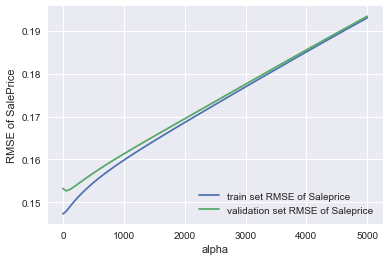

In [92]:
plt.plot(alphaRange, comp_metric_tr_all, label=r'train set RMSE of Saleprice')
plt.plot(alphaRange, comp_metric_val_all, label=r'validation set RMSE of Saleprice')
plt.legend(loc=4)
plt.xlabel("alpha")
plt.ylabel("RMSE of SalePrice")

ind = np.argmin(comp_metric_tr_all)
print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )
ind = np.argmin(comp_metric_val_all)
print("min of validation set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

ind = np.argmin( comp_metric_val_all-comp_metric_tr_all )
print("min of validation set RMSE minus training set RMSE occurs at alpha=%.2f" % alphaRange[ind]  )

In [109]:
print( comp_metric_tr_all[np.argmin(comp_metric_val_all)] )
print( min(comp_metric_val_all) )
print( alphaRange[np.argmin(comp_metric_val_all)] )

0.14784984944156063
0.15266003531511277
50.5060404040404


# Lasso regression

In [ ]:
coefs = []
intercepts = []
R2  = []
comp_metric_tr = []
alphaRange = np.linspace(1e-3,100.001,100)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = False)  
    lasso.fit(x1, y1)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(x1, y1))  
    comp_metric_tr.append( np.sqrt(np.mean(  (y1 - lasso.predict(x1))**2)) )
    
    

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(alphaRange, intercepts)
plt.title('Change of Lasso Intercept Varying Alpha')

In [ ]:
coefs = pd.DataFrame(np.array(coefs), columns=x1.columns)
plt.figure(figsize=(10,8))
plt.xlim([min(alphaRange ), max(alphaRange )*1.3  ])

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes with Varying Alpha')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(alphaRange, comp_metric_tr)
plt.title('Change of comp_metric(RMSE of SalePrice) of Lasso model with varying alpha')

ind = np.argmin(comp_metric_tr)
print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

# Lasso Regression with CV

In [110]:
import sklearn.model_selection as ms

ms_k3 = ms.KFold(n_splits=N_folds)

alphaRange = np.linspace(1e-3,100.001,100)
alphasize = len(alphaRange)

comp_metric_tr = np.zeros((alphasize, N_folds))
comp_metric_val = np.zeros((alphasize, N_folds))

RSS_tr = np.zeros((alphasize, N_folds))
RSS_val = np.zeros((alphasize, N_folds))
R2_tr = np.zeros((alphasize, N_folds))
R2_val = np.zeros((alphasize, N_folds))

n_tr = np.zeros((alphasize, N_folds))
n_val = np.zeros((alphasize, N_folds))


# for train_idx, val_idx in cv_k3s:
for alphaIdx, alpha in enumerate(alphaRange):
    lasso.set_params(alpha=alpha, normalize = False)  

    fold_i = -1

    # for train_idx, val_idx in cv_k3:
    for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
        fold_i = fold_i+1 # start from 0 
        lasso.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
        
        n_tr[alphaIdx,fold_i]=len(train_idx) 
        n_val[alphaIdx,fold_i]=len(val_idx) 
        
        comp_metric_tr[alphaIdx,fold_i] = \
        np.sqrt(   np.mean(  (y1.iloc[train_idx] - \
                              lasso.predict(x1.iloc[train_idx,]))**2  )   )
            
        comp_metric_val[alphaIdx,fold_i] = \
        np.sqrt(   np.mean(  (y1.iloc[val_idx] - \
                              lasso.predict(x1.iloc[val_idx,]))**2  )   )
        
        RSS_tr[alphaIdx,fold_i]=\
        np.sum((lasso.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) 
        RSS_val[alphaIdx,fold_i]=\
        np.sum((lasso.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) 
        R2_tr[alphaIdx,fold_i]=\
        lasso.score(x1.iloc[train_idx,], y1.iloc[train_idx])
        R2_val[alphaIdx,fold_i]=\
        lasso.score(x1.iloc[val_idx,], y1.iloc[val_idx])


Text(0, 0.5, 'RMSE of SalePrice')

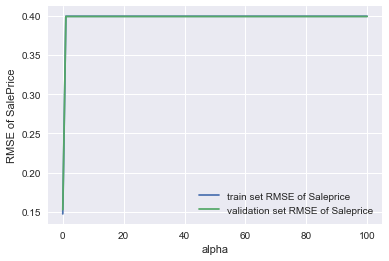

In [111]:
comp_metric_tr_all = np.sum( comp_metric_tr*np.sqrt(n_tr), 1)/np.sum(np.sqrt(n_tr), axis=1)
comp_metric_val_all = np.sum( comp_metric_val*np.sqrt(n_val), 1)/np.sum(np.sqrt(n_val), axis=1)


plt.plot(alphaRange, comp_metric_tr_all, label=r'train set RMSE of Saleprice')
plt.plot(alphaRange, comp_metric_val_all, label=r'validation set RMSE of Saleprice')
plt.legend(loc=4)
plt.xlabel("alpha")
plt.ylabel("RMSE of SalePrice")

In [112]:
ind = np.argmin(comp_metric_tr_all)
print("min of training set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )
ind = np.argmin(comp_metric_val_all)
print("min of validation set RMSE of SalePrice occurs at alpha=%.2f" % alphaRange[ind]  )

ind = np.argmin( comp_metric_val_all-comp_metric_tr_all )
print("min of validation set RMSE minus training set RMSE occurs at alpha=%.2f" % alphaRange[ind]  )


min of training set RMSE of SalePrice occurs at alpha=0.00
min of validation set RMSE of SalePrice occurs at alpha=0.00
min of validation set RMSE minus training set RMSE occurs at alpha=1.01


In [113]:
print( comp_metric_tr_all[np.argmin(comp_metric_val_all)] )
print( min(comp_metric_val_all) )
print( alphaRange[np.argmin(comp_metric_val_all)] )

0.14752521514211334
0.15294963261164718
0.001


# ElasticNet Regression

In [118]:
import sklearn.model_selection as ms
ms_k3 = ms.KFold(n_splits=N_folds)

alphaSize  = 40
rhoSize    = 30
alphaRange = np.linspace(1e-2, 1000, alphaSize)
rhoRange   = np.linspace(0.01, 10, rhoSize)
trainR2    = np.zeros((alphaSize, rhoSize))
# testR2     = np.zeros((alphaSize, rhoSize))
intercepts = np.zeros((alphaSize, rhoSize))
coefs      = np.zeros((alphaSize, rhoSize, len( comb_list ) ))
comp_metric_tr = np.zeros((alphaSize, rhoSize))

net.set_params(normalize=False)

for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
        net.set_params(alpha=alpha, l1_ratio=rho)
        net.fit(x1, y1)
        trainR2[alphaIdx, rhoIdx] = net.score(x1, y1)
        # testR2[alphaIdx, rhoIdx]  = net.score(testX, testY)
        intercepts[alphaIdx, rhoIdx] = net.intercept_
        coefs[alphaIdx, rhoIdx, :] = net.coef_
        comp_metric_tr[alphaIdx, rhoIdx] = \
        np.sqrt(np.mean(  (y1 - net.predict(x1))**2))   

# ElasticNet Regression with CV

In [154]:
import sklearn.model_selection as ms
ms_k3 = ms.KFold(n_splits=N_folds)

alphaSize  = 51
rhoSize    = 51
alphaRange = np.linspace(1e-3, 1000.001, alphaSize)
rhoRange   = np.linspace(0.01, 10.01, rhoSize)
comp_metric_tr = np.zeros((alphaSize, rhoSize, N_folds))
comp_metric_val = np.zeros((alphaSize, rhoSize, N_folds))

n_tr = np.zeros(N_folds)
n_val = np.zeros(N_folds)

net.set_params(normalize=False)

for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
        net.set_params(alpha=alpha, l1_ratio=rho)
        fold_i = -1
        for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
            fold_i = fold_i+1 # start from 0 
            net.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
            
            if( alphaIdx==0 & rhoIdx==0):
                n_tr[fold_i]=len(train_idx) 
                n_val[fold_i]=len(val_idx)            

            comp_metric_tr[alphaIdx, rhoIdx, fold_i] = \
            np.sqrt(   np.mean(  (y1.iloc[train_idx] - \
                                  net.predict(x1.iloc[train_idx,]))**2  )   )

            comp_metric_val[alphaIdx, rhoIdx, fold_i] = \
            np.sqrt(   np.mean(  (y1.iloc[val_idx] - \
                                  net.predict(x1.iloc[val_idx,]))**2  )   )     

In [155]:
comp_metric_tr_all = np.sum( comp_metric_tr*np.sqrt(n_tr), 2)/np.sum(np.sqrt(n_tr))
comp_metric_val_all = np.sum( comp_metric_val*np.sqrt(n_val), 2)/np.sum(np.sqrt(n_val))

In [156]:
np.min( comp_metric_val_all )

0.15292446171557073

In [157]:
ri, ci = comp_metric_val_all.argmin()//comp_metric_val_all.shape[1], comp_metric_val_all.argmin()%comp_metric_val_all.shape[1]


In [158]:
print(comp_metric_tr_all[ri,ci])

0.14760093612173023


In [162]:
print( alphaRange[ri] )
print( rhoRange[ci] )

0.001
1.2100000000000002


# Gradient Boosting

In [ ]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

In [ ]:
# case 1
gbm.fit(x1,y1)
gbm.score(x1,y1) # R^2 of the fit
comp_metric_tr = np.sqrt(   np.mean(  (y1 - gbm.predict(x1))**2  )   )
print(comp_metric_tr)

In [ ]:
# case 2 
gbm.set_params(verbose=1)
gbm.fit(x1,y1)

In [ ]:
# case 3
gbm.set_params(learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2)
gbm.fit(x1,y1)
comp_metric_tr = np.sqrt(   np.mean(  (y1 - gbm.predict(x1))**2  )   )
print(comp_metric_tr)

# GD with CV 

In [ ]:
# ref. codes

# sample 
# grid_param = [{'n_neighbors': range(3, 31)}]
# grid_param = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]

# simple version reference
# learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, warm_start=False, loss='ls',
# max_depth=2, max_features=2)

# samples 
# grid_param2 = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]
# para_search2 = GridSearchCV(knn, grid_param2, scoring='accuracy', cv=5, return_train_score=True)
# para_search2.fit(iris.data, iris.target)
# para_search2.cv_results_

In [ ]:
# from PML_3_soln
# GradientBoostingRegressor: 
# ref1) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html 
# ref2) https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting 

from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(warm_start=False, max_features = x1.shape[1])


In [ ]:
grid_param_choice = input('1: full-length grid search in GBM, 2:simple one, 3: simplest one')
grid_param_choice = int(grid_param_choice)

if (grid_param_choice==1):
    # full version
    grid_param = [{'learning_rate':[0.001,0.01,0.1,0.5,1.0],\
                  'n_estimators':[50,100,200, 500, 1000, 5000, 10000], 'subsample':[0.3,0.5,0.7,0.9], \
                   'max_depth':[1,2,3,4], 'min_impurity_decrease': [0, 0.01], \
                   'min_impurity_split': [1e-7], 'max_features': ['auto', 'sqrt', 'log2'], \
                   'loss':['ls', 'lad', 'huber', 'quantile']}]
elif (grid_param_choice==2):
    # grid_param simple version
    grid_param = [{ 'learning_rate':[0.001,0.01,0.1,0.5,1.0], 'n_estimators':[50,100,200,350,500], \
              'subsample':[0.3,0.5,0.7,0.9], 'loss':['ls', 'lad', 'huber', 'quantile'], \
              'max_depth':[1,2,3,4] }]
elif (grid_param_choice==3):
    # simplest version
    grid_param = [{'learning_rate':[0.001,0.1],'n_estimators':[50,200, 1000], 'subsample':[0.3,0.7,], \
                   'max_depth':[2,4], 'max_features': ['auto', 'sqrt', 'log2'], \
                   'loss':['ls']}]     


# note) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
# max_features : int, float, string or None, optional (default=None)
# The number of features to consider when looking for the best split:

# If int, then consider max_features features at each split.
# If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
# If “auto”, then max_features=n_features.
# If “sqrt”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# If None, then max_features=n_features.

# note) https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting 
# Empirical good default values are max_features=n_features for regression problems, 
# and max_features=sqrt(n_features) for classification tasks

In [ ]:
# remaining codes for simple version

# para_search = GridSearchCV( estimator=gbm, param_grid=grid_param, \
#                            scoring=‘neg_mean_squared_error’, \
#                            cv=N_folds, return_train_score=True )
# para_search = GridSearchCV(estimator=gbm, param_grid=grid_param, scoring=‘r2’, cv=N_folds, return_train_score=True )

para_search = GridSearchCV(estimator=gbm, param_grid=grid_param, scoring='neg_mean_squared_error', cv=N_folds, return_train_score=True)

In [ ]:
para_search = para_search.fit(x1, y1)
# para_search.fit(x1, y1)

In [ ]:
print(list(para_search.cv_results_.keys()))
para_search.cv_results_
para_search.grid_scores_ # in MSE 

print(para_search.best_score_) # in MSE 
print(para_search.best_params_)

# notes) 
# best_score_: Score of best_estimator on the hold out data.
# best_params_: Parameter setting that gave the best results on the hold out data.

In [ ]:
import sklearn.model_selection as ms

comp_metric_tr = []
comp_metric_val = []
n_tr = []
n_val = []
RSS_tr = []
RSS_val = []
R2_tr = []
R2_val = []

ms_k3 = ms.KFold(n_splits=N_folds)
gbm_best = para_search.best_estimator_

# for train_idx, val_idx in cv_k3:
for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
    gbm_best.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
    n_tr.append( len(train_idx) )
    n_val.append( len(val_idx) )
    comp_metric_tr.append(np.sqrt(   np.mean(  (y1.iloc[train_idx] - gbm_best.predict(x1.iloc[train_idx,]))**2  )   ))
    comp_metric_val.append(np.sqrt(   np.mean(  (y1.iloc[val_idx] - gbm_best.predict(x1.iloc[val_idx,]))**2  )   ))
    RSS_tr.append(   np.sum((gbm_best.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) )
    RSS_val.append(   np.sum((gbm_best.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) )
    R2_tr.append( gbm_best.score(x1.iloc[train_idx,], y1.iloc[train_idx])) 
    R2_val.append( gbm_best.score(x1.iloc[val_idx,], y1.iloc[val_idx]))

In [ ]:
comp_metric_tr_all = np.sum(comp_metric_tr*np.sqrt(n_tr)/sum(np.sqrt(n_tr)))
print(comp_metric_tr_all)

comp_metric_val_all = np.sum(comp_metric_val*np.sqrt(n_val)/sum(np.sqrt(n_val)))
print(comp_metric_val_all)

In [ ]:
gbm_best = para_search.best_estimator_
gbm_best.fit(x1, y1) ## trained again on whole x1 
gbm_best.score(x1, y1) # in MSE 

comp_metric_tr = np.sqrt(   np.mean(  (y1 - gbm_best.predict(x1))**2  )   )
print( comp_metric_tr )

# Random Forest with CV

In [332]:
from sklearn import ensemble


In [333]:
rforest = ensemble.RandomForestRegressor()


In [334]:
from sklearn.model_selection import GridSearchCV

In [339]:
from sklearn.model_selection import GridSearchCV

grid_param_tree_choice = input('1: full-length grid search in random forest, 2: simple one:, 3: fullest')
grid_param_tree_choice = int(grid_param_tree_choice)


if (grid_param_tree_choice==1):
    # full version
    grid_para_tree = [{ "n_estimators":range(10, 110, 10), "criterion": ["mse", "friedman_mse", "mae"],\
                       "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int), \
                       "min_samples_leaf": range(1, 10),'max_features': ['auto', 'sqrt', 'log2'],\
                        "max_depth": range(1, 31),"n_estimators": range(10, 110, 10) }]
elif (grid_param_tree_choice==2):
    # simple version
    grid_para_tree = [{ "n_estimators":range(10, 110, 10), "criterion": ["mse"], "splitter": ["best"],\
                       "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int), \
                       "min_samples_leaf": range(1, 10),'max_features': ['auto']}]    
if (grid_param_tree_choice==3):
    # full version
    grid_para_tree = [{ "n_estimators":range(10, 110, 10), "criterion": ["mse", "friedman_mse", "mae"], "splitter": ["best", "random"],\
                       "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int), \
                       "min_samples_leaf": range(1, 10),'max_features': ['auto', 'sqrt', 'log2', 2,4,6,8,10, 12, 14, 16, 18, 20, 22, 24, 26]}]
    
    
rforest.set_params(random_state=108)



1: full-length grid search in random forest, 2: simple one:, 3: fullest1


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=108, verbose=0,
                      warm_start=False)

In [340]:
grid_search_tree = GridSearchCV(estimator=rforest, param_grid=grid_para_tree, scoring='neg_mean_squared_error', cv=N_folds, n_jobs=-1)

In [ ]:
grid_search_tree.fit(x1, y1) # does CV 

In [ ]:
print(list(grid_search_tree.cv_results_.keys()))

grid_search_tree.cv_results_
grid_search_tree.grid_scores_ # in MSE 

## best score # lsw) in MSE here 
print( grid_search_tree.best_score_ )

## best parameters
print( grid_search_tree.best_params_ )

# note
# best_score_: Score of best_estimator on the hold out data.
# best_params_: Parameter setting that gave the best results on the hold out data.

In [ ]:
import sklearn.model_selection as ms

comp_metric_tr = []
comp_metric_val = []
n_tr = []
n_val = []
RSS_tr = []
RSS_val = []
R2_tr = []
R2_val = []

ms_k3 = ms.KFold(n_splits=N_folds)
rforest_best = grid_search_tree.best_estimator_ 

# for train_idx, val_idx in cv_k3:
for train_idx, val_idx in ms_k3.split(X=x1, y=y1):
    tree_best.fit( x1.iloc[train_idx,], y1.iloc[train_idx] )
    n_tr.append( len(train_idx) )
    n_val.append( len(val_idx) )
    comp_metric_tr.append(np.sqrt(   np.mean(  (y1.iloc[train_idx] - tree_best.predict(x1.iloc[train_idx,]))**2  )   ))
    comp_metric_val.append(np.sqrt(   np.mean(  (y1.iloc[val_idx] - tree_best.predict(x1.iloc[val_idx,]))**2  )   ))
    RSS_tr.append(   np.sum((tree_best.predict(x1.iloc[train_idx,]) - y1.iloc[train_idx]) ** 2) )
    RSS_val.append(   np.sum((tree_best.predict(x1.iloc[val_idx,]) - y1.iloc[val_idx]) ** 2) )
    R2_tr.append( tree_best.score(x1.iloc[train_idx,], y1.iloc[train_idx])) 
    R2_val.append( tree_best.score(x1.iloc[val_idx,], y1.iloc[val_idx]))

In [ ]:
comp_metric_tr_all = np.sum(comp_metric_tr*np.sqrt(n_tr)/sum(np.sqrt(n_tr)))
print(comp_metric_tr_all)

comp_metric_val_all = np.sum(comp_metric_val*np.sqrt(n_val)/sum(np.sqrt(n_val)))
print(comp_metric_val_all)

In [ ]:
rforest_best = grid_search_tree.best_estimator_
rforest_best.fit(x1, y1) # trained again
rforest_best.score(x1, y1) # overall MSE 

In [ ]:
comp_metric_tr = np.sqrt(   np.mean(  (y1 - tree_best.predict(x1))**2  )   )
print(comp_metric_tr)